# In this notebook we show how MICE can be used to perform sensitive analysis
We compare mice to the classical MINE, and to sobol indices in order to class the differents variables by strength. MICE can be used to estimate high order of sensitivity index. 

In [65]:
from models import mice #notre m
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from models import mine

### Define a specific function for sensitivity analysis 
We first define a function to perform a sensitivity analysis on 2 or 3 variables. One important, the second less and the third one not at all.

In [2]:
def f(x,y,z): #function that can totaly be an output of a random scenario generator such as chess
    return 2*x**2+3*y+np.sin(z)*y**2

In [35]:
x,y,z=np.random.uniform(0,10,1000),np.random.normal(0,10,1000),np.random.uniform(0,1,1000)
opt = f(x,y,z)

On visualise en fonction de x et y puis en fonction de y et z la fonction, afin de vérifier qu'il y a bien une corrélation interne.

On sent que y jour un rôle important. De même x semble aussi être clef, mais difficile de hiérarchiser les variables en observant à l'oeil la fonction. On se rapproche de ce qu'on aura techniquement sur un générateur de scénarios économiques en assurance par exemple. 

#### Analyse de la variable x1

In [5]:
sample_x = np.zeros((1000,2)) #it is important to make this step of normalization, to help the model learning the copula
ecdf = ECDF(x)
ecdf_f = ECDF(opt)
sample_x[:,0]=ecdf(x)
sample_x[:,1]=ecdf_f(opt)


In [6]:
mice_x = mice.MICE(dim_latent=6, dim_out=2, n_samples_train=200, n_layers=2, n_neurons=100) 
mice_x.fit(sample_x, batch_size=200, epochs=200)

100%|██████████| 200/200 [00:25<00:00,  7.94it/s]


7/7 [==============================] - 0s 4ms/step
0 [D total loss : 1.165564, Copula estimates: 0.642624, Self-consistency mean test: 0.650031]
7/7 [==============================] - 0s 2ms/step
1 [D total loss : 1.104749, Copula estimates: 0.706381, Self-consistency mean test: 0.708706]
7/7 [==============================] - 0s 3ms/step
2 [D total loss : 1.076100, Copula estimates: 0.764580, Self-consistency mean test: 0.774724]
7/7 [==============================] - 0s 5ms/step
3 [D total loss : 1.043352, Copula estimates: 0.823294, Self-consistency mean test: 0.824666]
7/7 [==============================] - 0s 2ms/step
4 [D total loss : 1.076456, Copula estimates: 0.868298, Self-consistency mean test: 0.871898]
7/7 [==============================] - 0s 4ms/step
5 [D total loss : 1.042785, Copula estimates: 0.904376, Self-consistency mean test: 0.900426]
7/7 [==============================] - 0s 4ms/step
6 [D total loss : 1.009240, Copula estimates: 0.935928, Self-consistency mean t

7/7 [==============================] - 0s 3ms/step
33 [D total loss : 0.980974, Copula estimates: 0.996715, Self-consistency mean test: 0.970018]
7/7 [==============================] - 0s 4ms/step
34 [D total loss : 1.031931, Copula estimates: 1.003505, Self-consistency mean test: 0.982128]
7/7 [==============================] - 0s 3ms/step
35 [D total loss : 0.986695, Copula estimates: 0.999460, Self-consistency mean test: 0.965671]
7/7 [==============================] - 0s 3ms/step
36 [D total loss : 1.041991, Copula estimates: 0.992796, Self-consistency mean test: 0.968287]
7/7 [==============================] - 0s 3ms/step
37 [D total loss : 1.002875, Copula estimates: 0.976857, Self-consistency mean test: 0.954799]
7/7 [==============================] - 0s 3ms/step
38 [D total loss : 1.028931, Copula estimates: 0.952972, Self-consistency mean test: 0.932776]
7/7 [==============================] - 0s 3ms/step
39 [D total loss : 0.990871, Copula estimates: 0.944653, Self-consistency

7/7 [==============================] - 0s 3ms/step
66 [D total loss : 1.007661, Copula estimates: 0.980917, Self-consistency mean test: 0.941794]
7/7 [==============================] - 0s 3ms/step
67 [D total loss : 1.000894, Copula estimates: 0.964149, Self-consistency mean test: 0.917503]
7/7 [==============================] - 0s 3ms/step
68 [D total loss : 0.979000, Copula estimates: 0.961678, Self-consistency mean test: 0.893272]
7/7 [==============================] - 0s 4ms/step
69 [D total loss : 0.992383, Copula estimates: 0.970288, Self-consistency mean test: 0.911940]
7/7 [==============================] - 0s 4ms/step
70 [D total loss : 1.003455, Copula estimates: 0.999772, Self-consistency mean test: 0.958498]
7/7 [==============================] - 0s 2ms/step
71 [D total loss : 1.003345, Copula estimates: 1.017480, Self-consistency mean test: 0.953158]
7/7 [==============================] - 0s 3ms/step
72 [D total loss : 0.995810, Copula estimates: 1.017920, Self-consistency

7/7 [==============================] - 0s 2ms/step
99 [D total loss : 0.927191, Copula estimates: 0.972941, Self-consistency mean test: 0.889699]
7/7 [==============================] - 0s 3ms/step
100 [D total loss : 1.006150, Copula estimates: 0.978141, Self-consistency mean test: 0.915740]
7/7 [==============================] - 0s 4ms/step
101 [D total loss : 0.942708, Copula estimates: 0.995830, Self-consistency mean test: 0.896916]
7/7 [==============================] - 0s 3ms/step
102 [D total loss : 0.991757, Copula estimates: 1.014781, Self-consistency mean test: 0.926642]
7/7 [==============================] - 0s 3ms/step
103 [D total loss : 0.955072, Copula estimates: 1.000262, Self-consistency mean test: 0.920347]
7/7 [==============================] - 0s 3ms/step
104 [D total loss : 0.921806, Copula estimates: 1.015392, Self-consistency mean test: 0.907470]
7/7 [==============================] - 0s 3ms/step
105 [D total loss : 0.964624, Copula estimates: 1.004608, Self-consi

7/7 [==============================] - 0s 2ms/step
132 [D total loss : 0.906189, Copula estimates: 1.055956, Self-consistency mean test: 0.915014]
7/7 [==============================] - 0s 3ms/step
133 [D total loss : 0.931416, Copula estimates: 1.061888, Self-consistency mean test: 0.916476]
7/7 [==============================] - 0s 3ms/step
134 [D total loss : 0.894978, Copula estimates: 1.072804, Self-consistency mean test: 0.929177]
7/7 [==============================] - 0s 2ms/step
135 [D total loss : 0.915639, Copula estimates: 1.057311, Self-consistency mean test: 0.923044]
7/7 [==============================] - 0s 2ms/step
136 [D total loss : 0.891237, Copula estimates: 1.108184, Self-consistency mean test: 0.954849]
7/7 [==============================] - 0s 2ms/step
137 [D total loss : 0.914787, Copula estimates: 1.108447, Self-consistency mean test: 0.945054]
7/7 [==============================] - 0s 3ms/step
138 [D total loss : 0.959433, Copula estimates: 1.073281, Self-cons

7/7 [==============================] - 0s 3ms/step
165 [D total loss : 0.843108, Copula estimates: 1.128205, Self-consistency mean test: 0.931748]
7/7 [==============================] - 0s 3ms/step
166 [D total loss : 0.893087, Copula estimates: 1.131796, Self-consistency mean test: 0.887342]
7/7 [==============================] - 0s 2ms/step
167 [D total loss : 0.874440, Copula estimates: 1.164405, Self-consistency mean test: 0.931238]
7/7 [==============================] - 0s 2ms/step
168 [D total loss : 0.876150, Copula estimates: 1.166323, Self-consistency mean test: 0.925447]
7/7 [==============================] - 0s 2ms/step
169 [D total loss : 0.908766, Copula estimates: 1.139349, Self-consistency mean test: 0.911881]
7/7 [==============================] - 0s 2ms/step
170 [D total loss : 0.877888, Copula estimates: 1.159497, Self-consistency mean test: 0.877704]
7/7 [==============================] - 0s 2ms/step
171 [D total loss : 0.873306, Copula estimates: 1.178544, Self-cons

7/7 [==============================] - 0s 3ms/step
198 [D total loss : 0.850192, Copula estimates: 1.202863, Self-consistency mean test: 0.873115]
7/7 [==============================] - 0s 3ms/step
199 [D total loss : 0.883879, Copula estimates: 1.158600, Self-consistency mean test: 0.827056]
7/7 [==============================] - 0s 3ms/step
200 [D total loss : 0.889841, Copula estimates: 1.212272, Self-consistency mean test: 0.863129]
7/7 [==============================] - 0s 2ms/step
201 [D total loss : 0.757193, Copula estimates: 1.303978, Self-consistency mean test: 0.874160]
7/7 [==============================] - 0s 2ms/step
202 [D total loss : 0.795415, Copula estimates: 1.268523, Self-consistency mean test: 0.884872]
7/7 [==============================] - 0s 2ms/step
203 [D total loss : 0.846294, Copula estimates: 1.276403, Self-consistency mean test: 0.921703]
7/7 [==============================] - 0s 2ms/step
204 [D total loss : 0.841546, Copula estimates: 1.216675, Self-cons

7/7 [==============================] - 0s 6ms/step
231 [D total loss : 0.788465, Copula estimates: 1.365120, Self-consistency mean test: 0.957722]
7/7 [==============================] - 0s 2ms/step
232 [D total loss : 0.643942, Copula estimates: 1.355039, Self-consistency mean test: 0.836436]
7/7 [==============================] - 0s 4ms/step
233 [D total loss : 0.845606, Copula estimates: 1.318396, Self-consistency mean test: 0.933741]
7/7 [==============================] - 0s 2ms/step
234 [D total loss : 0.808163, Copula estimates: 1.278467, Self-consistency mean test: 0.894166]
7/7 [==============================] - 0s 2ms/step
235 [D total loss : 0.669744, Copula estimates: 1.326006, Self-consistency mean test: 0.798621]
7/7 [==============================] - 0s 3ms/step
236 [D total loss : 0.818275, Copula estimates: 1.268369, Self-consistency mean test: 0.840445]
7/7 [==============================] - 0s 2ms/step
237 [D total loss : 0.693896, Copula estimates: 1.279270, Self-cons

7/7 [==============================] - 0s 3ms/step
264 [D total loss : 0.559802, Copula estimates: 1.513689, Self-consistency mean test: 0.842264]
7/7 [==============================] - 0s 3ms/step
265 [D total loss : 0.701470, Copula estimates: 1.416996, Self-consistency mean test: 0.791735]
7/7 [==============================] - 0s 3ms/step
266 [D total loss : 0.657752, Copula estimates: 1.467711, Self-consistency mean test: 0.793815]
7/7 [==============================] - 0s 2ms/step
267 [D total loss : 0.607614, Copula estimates: 1.519189, Self-consistency mean test: 0.839090]
7/7 [==============================] - 0s 2ms/step
268 [D total loss : 0.666593, Copula estimates: 1.487872, Self-consistency mean test: 0.911904]
7/7 [==============================] - 0s 2ms/step
269 [D total loss : 0.710477, Copula estimates: 1.513376, Self-consistency mean test: 0.934569]
7/7 [==============================] - 0s 3ms/step
270 [D total loss : 0.683901, Copula estimates: 1.493172, Self-cons

7/7 [==============================] - 0s 3ms/step
297 [D total loss : 0.651306, Copula estimates: 1.445598, Self-consistency mean test: 0.901677]
7/7 [==============================] - 0s 4ms/step
298 [D total loss : 0.694087, Copula estimates: 1.477666, Self-consistency mean test: 0.907858]
7/7 [==============================] - 0s 3ms/step
299 [D total loss : 0.673639, Copula estimates: 1.546869, Self-consistency mean test: 0.940124]
7/7 [==============================] - 0s 3ms/step
300 [D total loss : 0.687533, Copula estimates: 1.512845, Self-consistency mean test: 0.934332]
7/7 [==============================] - 0s 2ms/step
301 [D total loss : 0.659792, Copula estimates: 1.454245, Self-consistency mean test: 0.840863]
7/7 [==============================] - 0s 3ms/step
302 [D total loss : 0.592617, Copula estimates: 1.483163, Self-consistency mean test: 0.829025]
7/7 [==============================] - 0s 3ms/step
303 [D total loss : 0.687772, Copula estimates: 1.440338, Self-cons

7/7 [==============================] - 0s 2ms/step
330 [D total loss : 0.673583, Copula estimates: 1.509775, Self-consistency mean test: 0.913647]
7/7 [==============================] - 0s 3ms/step
331 [D total loss : 0.676582, Copula estimates: 1.586149, Self-consistency mean test: 0.953870]
7/7 [==============================] - 0s 3ms/step
332 [D total loss : 0.649565, Copula estimates: 1.403988, Self-consistency mean test: 0.858483]
7/7 [==============================] - 0s 2ms/step
333 [D total loss : 0.703678, Copula estimates: 1.451576, Self-consistency mean test: 0.861630]
7/7 [==============================] - 0s 2ms/step
334 [D total loss : 0.534934, Copula estimates: 1.636183, Self-consistency mean test: 0.924690]
7/7 [==============================] - 0s 2ms/step
335 [D total loss : 0.727434, Copula estimates: 1.573384, Self-consistency mean test: 0.973981]
7/7 [==============================] - 0s 2ms/step
336 [D total loss : 0.651972, Copula estimates: 1.522605, Self-cons

7/7 [==============================] - 0s 3ms/step
363 [D total loss : 0.588948, Copula estimates: 1.752010, Self-consistency mean test: 1.059570]
7/7 [==============================] - 0s 4ms/step
364 [D total loss : 0.639374, Copula estimates: 1.639896, Self-consistency mean test: 1.023537]
7/7 [==============================] - 0s 3ms/step
365 [D total loss : 0.622533, Copula estimates: 1.493791, Self-consistency mean test: 0.783667]
7/7 [==============================] - 0s 2ms/step
366 [D total loss : 0.690911, Copula estimates: 1.619612, Self-consistency mean test: 0.943117]
7/7 [==============================] - 0s 3ms/step
367 [D total loss : 0.709409, Copula estimates: 1.584108, Self-consistency mean test: 0.878491]
7/7 [==============================] - 0s 5ms/step
368 [D total loss : 0.623555, Copula estimates: 1.601579, Self-consistency mean test: 0.931179]
7/7 [==============================] - 0s 3ms/step
369 [D total loss : 0.717776, Copula estimates: 1.618042, Self-cons

7/7 [==============================] - 0s 2ms/step
396 [D total loss : 0.742420, Copula estimates: 1.536244, Self-consistency mean test: 0.901944]
7/7 [==============================] - 0s 2ms/step
397 [D total loss : 0.490653, Copula estimates: 1.653426, Self-consistency mean test: 0.846236]
7/7 [==============================] - 0s 4ms/step
398 [D total loss : 0.609977, Copula estimates: 1.622174, Self-consistency mean test: 0.892211]
7/7 [==============================] - 0s 3ms/step
399 [D total loss : 0.619908, Copula estimates: 1.614015, Self-consistency mean test: 0.940148]
7/7 [==============================] - 0s 2ms/step
400 [D total loss : 0.681387, Copula estimates: 1.490584, Self-consistency mean test: 0.870984]
7/7 [==============================] - 0s 3ms/step
401 [D total loss : 0.649432, Copula estimates: 1.493075, Self-consistency mean test: 0.841681]
7/7 [==============================] - 0s 3ms/step
402 [D total loss : 0.597217, Copula estimates: 1.636549, Self-cons

7/7 [==============================] - 0s 3ms/step
429 [D total loss : 0.606174, Copula estimates: 1.729507, Self-consistency mean test: 0.967275]
7/7 [==============================] - 0s 3ms/step
430 [D total loss : 0.639800, Copula estimates: 1.599851, Self-consistency mean test: 0.806365]
7/7 [==============================] - 0s 4ms/step
431 [D total loss : 0.584621, Copula estimates: 1.599017, Self-consistency mean test: 0.901861]
7/7 [==============================] - 0s 2ms/step
432 [D total loss : 0.622042, Copula estimates: 1.632900, Self-consistency mean test: 0.904088]
7/7 [==============================] - 0s 2ms/step
433 [D total loss : 0.718753, Copula estimates: 1.777213, Self-consistency mean test: 1.016466]
7/7 [==============================] - 0s 3ms/step
434 [D total loss : 0.691787, Copula estimates: 1.719529, Self-consistency mean test: 0.982737]
7/7 [==============================] - 0s 3ms/step
435 [D total loss : 0.569414, Copula estimates: 1.764197, Self-cons

7/7 [==============================] - 0s 2ms/step
462 [D total loss : 0.640532, Copula estimates: 1.733676, Self-consistency mean test: 0.954733]
7/7 [==============================] - 0s 3ms/step
463 [D total loss : 0.647929, Copula estimates: 1.612698, Self-consistency mean test: 0.947898]
7/7 [==============================] - 0s 4ms/step
464 [D total loss : 0.495537, Copula estimates: 1.677881, Self-consistency mean test: 0.854298]
7/7 [==============================] - 0s 4ms/step
465 [D total loss : 0.620232, Copula estimates: 1.585128, Self-consistency mean test: 0.872383]
7/7 [==============================] - 0s 2ms/step
466 [D total loss : 0.585462, Copula estimates: 1.593614, Self-consistency mean test: 0.834804]
7/7 [==============================] - 0s 3ms/step
467 [D total loss : 0.624912, Copula estimates: 1.640136, Self-consistency mean test: 0.909864]
7/7 [==============================] - 0s 5ms/step
468 [D total loss : 0.721853, Copula estimates: 1.514602, Self-cons

7/7 [==============================] - 0s 4ms/step
495 [D total loss : 0.625794, Copula estimates: 1.660132, Self-consistency mean test: 0.878985]
7/7 [==============================] - 0s 3ms/step
496 [D total loss : 0.495979, Copula estimates: 1.638857, Self-consistency mean test: 0.882013]
7/7 [==============================] - 0s 4ms/step
497 [D total loss : 0.663025, Copula estimates: 1.665484, Self-consistency mean test: 0.946316]
7/7 [==============================] - 0s 2ms/step
498 [D total loss : 0.590654, Copula estimates: 1.670535, Self-consistency mean test: 0.932621]
7/7 [==============================] - 0s 3ms/step
499 [D total loss : 0.573432, Copula estimates: 1.613220, Self-consistency mean test: 0.884214]
7/7 [==============================] - 0s 3ms/step
500 [D total loss : 0.743203, Copula estimates: 1.524641, Self-consistency mean test: 0.945359]
7/7 [==============================] - 0s 3ms/step
501 [D total loss : 0.643462, Copula estimates: 1.601717, Self-cons

7/7 [==============================] - 0s 2ms/step
528 [D total loss : 0.703355, Copula estimates: 1.657670, Self-consistency mean test: 1.009186]
7/7 [==============================] - 0s 2ms/step
529 [D total loss : 0.555478, Copula estimates: 1.776923, Self-consistency mean test: 1.006153]
7/7 [==============================] - 0s 2ms/step
530 [D total loss : 0.421420, Copula estimates: 1.693097, Self-consistency mean test: 0.730060]
7/7 [==============================] - 0s 2ms/step
531 [D total loss : 0.718403, Copula estimates: 1.655084, Self-consistency mean test: 0.944341]
7/7 [==============================] - 0s 2ms/step
532 [D total loss : 0.607142, Copula estimates: 1.615798, Self-consistency mean test: 0.925636]
7/7 [==============================] - 0s 3ms/step
533 [D total loss : 0.535082, Copula estimates: 1.721472, Self-consistency mean test: 0.882437]
7/7 [==============================] - 0s 3ms/step
534 [D total loss : 0.510937, Copula estimates: 1.769385, Self-cons

7/7 [==============================] - 0s 4ms/step
561 [D total loss : 0.754939, Copula estimates: 1.549381, Self-consistency mean test: 0.860289]
7/7 [==============================] - 0s 2ms/step
562 [D total loss : 0.645296, Copula estimates: 1.761273, Self-consistency mean test: 0.922050]
7/7 [==============================] - 0s 2ms/step
563 [D total loss : 0.709856, Copula estimates: 1.649435, Self-consistency mean test: 0.952227]
7/7 [==============================] - 0s 2ms/step
564 [D total loss : 0.413255, Copula estimates: 1.835604, Self-consistency mean test: 0.826876]
7/7 [==============================] - 0s 3ms/step
565 [D total loss : 0.742887, Copula estimates: 1.645400, Self-consistency mean test: 0.956172]
7/7 [==============================] - 0s 3ms/step
566 [D total loss : 0.536584, Copula estimates: 1.672771, Self-consistency mean test: 0.824099]
7/7 [==============================] - 0s 3ms/step
567 [D total loss : 0.594404, Copula estimates: 1.769120, Self-cons

7/7 [==============================] - 0s 3ms/step
594 [D total loss : 0.577203, Copula estimates: 1.752792, Self-consistency mean test: 0.911547]
7/7 [==============================] - 0s 2ms/step
595 [D total loss : 0.648769, Copula estimates: 1.638905, Self-consistency mean test: 0.912330]
7/7 [==============================] - 0s 4ms/step
596 [D total loss : 0.410589, Copula estimates: 1.652720, Self-consistency mean test: 0.792782]
7/7 [==============================] - 0s 2ms/step
597 [D total loss : 0.577987, Copula estimates: 1.766353, Self-consistency mean test: 0.972790]
7/7 [==============================] - 0s 2ms/step
598 [D total loss : 0.541628, Copula estimates: 1.876471, Self-consistency mean test: 0.954757]
7/7 [==============================] - 0s 2ms/step
599 [D total loss : 0.676659, Copula estimates: 1.818571, Self-consistency mean test: 1.047877]
7/7 [==============================] - 0s 3ms/step
600 [D total loss : 0.546478, Copula estimates: 1.796008, Self-cons

7/7 [==============================] - 0s 4ms/step
627 [D total loss : 0.607510, Copula estimates: 1.775795, Self-consistency mean test: 0.933363]
7/7 [==============================] - 0s 3ms/step
628 [D total loss : 0.712613, Copula estimates: 1.722216, Self-consistency mean test: 0.964833]
7/7 [==============================] - 0s 3ms/step
629 [D total loss : 0.537619, Copula estimates: 1.905465, Self-consistency mean test: 0.952781]
7/7 [==============================] - 0s 2ms/step
630 [D total loss : 0.595572, Copula estimates: 1.784886, Self-consistency mean test: 0.923187]
7/7 [==============================] - 0s 2ms/step
631 [D total loss : 0.616344, Copula estimates: 1.781225, Self-consistency mean test: 0.942393]
7/7 [==============================] - 0s 5ms/step
632 [D total loss : 0.714807, Copula estimates: 1.597189, Self-consistency mean test: 0.843013]
7/7 [==============================] - 0s 4ms/step
633 [D total loss : 0.600048, Copula estimates: 1.798924, Self-cons

7/7 [==============================] - 0s 5ms/step
660 [D total loss : 0.589137, Copula estimates: 1.795332, Self-consistency mean test: 0.962343]
7/7 [==============================] - 0s 3ms/step
661 [D total loss : 0.744470, Copula estimates: 1.807439, Self-consistency mean test: 1.109348]
7/7 [==============================] - 0s 2ms/step
662 [D total loss : 0.489667, Copula estimates: 1.701510, Self-consistency mean test: 0.812840]
7/7 [==============================] - 0s 3ms/step
663 [D total loss : 0.513516, Copula estimates: 1.651519, Self-consistency mean test: 0.802296]
7/7 [==============================] - 0s 3ms/step
664 [D total loss : 0.473620, Copula estimates: 1.777304, Self-consistency mean test: 0.763858]
7/7 [==============================] - 0s 2ms/step
665 [D total loss : 0.571499, Copula estimates: 1.893012, Self-consistency mean test: 0.955695]
7/7 [==============================] - 0s 3ms/step
666 [D total loss : 0.854714, Copula estimates: 1.606128, Self-cons

7/7 [==============================] - 0s 4ms/step
693 [D total loss : 0.549158, Copula estimates: 1.674803, Self-consistency mean test: 0.826285]
7/7 [==============================] - 0s 2ms/step
694 [D total loss : 0.650106, Copula estimates: 1.718431, Self-consistency mean test: 0.981349]
7/7 [==============================] - 0s 2ms/step
695 [D total loss : 0.565507, Copula estimates: 1.841423, Self-consistency mean test: 0.882173]
7/7 [==============================] - 0s 3ms/step
696 [D total loss : 0.721416, Copula estimates: 1.850620, Self-consistency mean test: 1.057972]
7/7 [==============================] - 0s 4ms/step
697 [D total loss : 0.653825, Copula estimates: 1.836720, Self-consistency mean test: 1.044378]
7/7 [==============================] - 0s 3ms/step
698 [D total loss : 0.584427, Copula estimates: 1.795970, Self-consistency mean test: 0.956252]
7/7 [==============================] - 0s 2ms/step
699 [D total loss : 0.584673, Copula estimates: 1.788226, Self-cons

7/7 [==============================] - 0s 3ms/step
726 [D total loss : 0.496694, Copula estimates: 1.806096, Self-consistency mean test: 0.909290]
7/7 [==============================] - 0s 3ms/step
727 [D total loss : 0.445689, Copula estimates: 1.760104, Self-consistency mean test: 0.796052]
7/7 [==============================] - 0s 2ms/step
728 [D total loss : 0.599430, Copula estimates: 1.883391, Self-consistency mean test: 0.976036]
7/7 [==============================] - 0s 3ms/step
729 [D total loss : 0.561442, Copula estimates: 1.756998, Self-consistency mean test: 0.882702]
7/7 [==============================] - 0s 3ms/step
730 [D total loss : 0.634348, Copula estimates: 1.772031, Self-consistency mean test: 0.928546]
7/7 [==============================] - 0s 4ms/step
731 [D total loss : 0.517698, Copula estimates: 1.784958, Self-consistency mean test: 0.912525]
7/7 [==============================] - 0s 2ms/step
732 [D total loss : 0.613632, Copula estimates: 1.858975, Self-cons

7/7 [==============================] - 0s 3ms/step
759 [D total loss : 0.630984, Copula estimates: 1.806499, Self-consistency mean test: 0.881724]
7/7 [==============================] - 0s 4ms/step
760 [D total loss : 0.559917, Copula estimates: 1.800796, Self-consistency mean test: 0.895163]
7/7 [==============================] - 0s 3ms/step
761 [D total loss : 0.552189, Copula estimates: 1.931218, Self-consistency mean test: 1.041515]
7/7 [==============================] - 0s 2ms/step
762 [D total loss : 0.576341, Copula estimates: 1.815036, Self-consistency mean test: 0.930730]
7/7 [==============================] - 0s 2ms/step
763 [D total loss : 0.520930, Copula estimates: 1.723146, Self-consistency mean test: 0.860316]
7/7 [==============================] - 0s 2ms/step
764 [D total loss : 0.598346, Copula estimates: 1.768888, Self-consistency mean test: 0.893944]
7/7 [==============================] - 0s 3ms/step
765 [D total loss : 0.525218, Copula estimates: 1.830344, Self-cons

7/7 [==============================] - 0s 3ms/step
792 [D total loss : 0.631672, Copula estimates: 1.750177, Self-consistency mean test: 0.943841]
7/7 [==============================] - 0s 3ms/step
793 [D total loss : 0.737100, Copula estimates: 1.620716, Self-consistency mean test: 0.907021]
7/7 [==============================] - 0s 4ms/step
794 [D total loss : 0.493858, Copula estimates: 1.636699, Self-consistency mean test: 0.818231]
7/7 [==============================] - 0s 2ms/step
795 [D total loss : 0.482782, Copula estimates: 1.698134, Self-consistency mean test: 0.826810]
7/7 [==============================] - 0s 2ms/step
796 [D total loss : 0.517329, Copula estimates: 1.747952, Self-consistency mean test: 0.946589]
7/7 [==============================] - 0s 2ms/step
797 [D total loss : 0.587795, Copula estimates: 1.803562, Self-consistency mean test: 0.960188]
7/7 [==============================] - 0s 3ms/step
798 [D total loss : 0.495923, Copula estimates: 1.810580, Self-cons

7/7 [==============================] - 0s 2ms/step
825 [D total loss : 0.472285, Copula estimates: 1.997920, Self-consistency mean test: 0.973150]
7/7 [==============================] - 0s 2ms/step
826 [D total loss : 0.533188, Copula estimates: 1.930476, Self-consistency mean test: 0.971751]
7/7 [==============================] - 0s 3ms/step
827 [D total loss : 0.677973, Copula estimates: 1.608889, Self-consistency mean test: 0.813236]
7/7 [==============================] - 0s 3ms/step
828 [D total loss : 0.595935, Copula estimates: 1.923994, Self-consistency mean test: 0.950497]
7/7 [==============================] - 0s 2ms/step
829 [D total loss : 0.508439, Copula estimates: 2.037794, Self-consistency mean test: 1.019547]
7/7 [==============================] - 0s 2ms/step
830 [D total loss : 0.580229, Copula estimates: 1.945521, Self-consistency mean test: 0.962311]
7/7 [==============================] - 0s 3ms/step
831 [D total loss : 0.541304, Copula estimates: 1.744902, Self-cons

7/7 [==============================] - 0s 3ms/step
858 [D total loss : 0.533190, Copula estimates: 1.824171, Self-consistency mean test: 1.005064]
7/7 [==============================] - 0s 2ms/step
859 [D total loss : 0.481725, Copula estimates: 1.827926, Self-consistency mean test: 0.891190]
7/7 [==============================] - 0s 4ms/step
860 [D total loss : 0.617106, Copula estimates: 1.796641, Self-consistency mean test: 0.891987]
7/7 [==============================] - 0s 3ms/step
861 [D total loss : 0.635512, Copula estimates: 1.880651, Self-consistency mean test: 1.051540]
7/7 [==============================] - 0s 3ms/step
862 [D total loss : 0.549552, Copula estimates: 1.734967, Self-consistency mean test: 0.909764]
7/7 [==============================] - 0s 3ms/step
863 [D total loss : 0.616478, Copula estimates: 1.907569, Self-consistency mean test: 1.015362]
7/7 [==============================] - 0s 3ms/step
864 [D total loss : 0.513768, Copula estimates: 1.798389, Self-cons

7/7 [==============================] - 0s 3ms/step
891 [D total loss : 0.594480, Copula estimates: 1.959847, Self-consistency mean test: 1.025477]
7/7 [==============================] - 0s 2ms/step
892 [D total loss : 0.580504, Copula estimates: 1.772943, Self-consistency mean test: 0.976652]
7/7 [==============================] - 0s 3ms/step
893 [D total loss : 0.568003, Copula estimates: 1.790465, Self-consistency mean test: 0.917739]
7/7 [==============================] - 0s 3ms/step
894 [D total loss : 0.505967, Copula estimates: 1.823357, Self-consistency mean test: 0.932830]
7/7 [==============================] - 0s 2ms/step
895 [D total loss : 0.618092, Copula estimates: 1.726153, Self-consistency mean test: 0.899887]
7/7 [==============================] - 0s 2ms/step
896 [D total loss : 0.484887, Copula estimates: 1.853715, Self-consistency mean test: 0.823398]
7/7 [==============================] - 0s 3ms/step
897 [D total loss : 0.594335, Copula estimates: 1.926169, Self-cons

7/7 [==============================] - 0s 3ms/step
924 [D total loss : 0.532010, Copula estimates: 1.836905, Self-consistency mean test: 0.879540]
7/7 [==============================] - 0s 2ms/step
925 [D total loss : 0.525737, Copula estimates: 1.872096, Self-consistency mean test: 0.940447]
7/7 [==============================] - 0s 3ms/step
926 [D total loss : 0.463439, Copula estimates: 1.945175, Self-consistency mean test: 0.897636]
7/7 [==============================] - 0s 4ms/step
927 [D total loss : 0.607736, Copula estimates: 1.977050, Self-consistency mean test: 1.052498]
7/7 [==============================] - 0s 3ms/step
928 [D total loss : 0.412574, Copula estimates: 1.874690, Self-consistency mean test: 0.924098]
7/7 [==============================] - 0s 3ms/step
929 [D total loss : 0.520465, Copula estimates: 1.962494, Self-consistency mean test: 0.972728]
7/7 [==============================] - 0s 2ms/step
930 [D total loss : 0.548194, Copula estimates: 1.867198, Self-cons

7/7 [==============================] - 0s 3ms/step
957 [D total loss : 0.601417, Copula estimates: 1.733208, Self-consistency mean test: 0.938607]
7/7 [==============================] - 0s 4ms/step
958 [D total loss : 0.514718, Copula estimates: 1.744430, Self-consistency mean test: 0.943477]
7/7 [==============================] - 0s 2ms/step
959 [D total loss : 0.638268, Copula estimates: 1.672260, Self-consistency mean test: 0.883898]
7/7 [==============================] - 0s 4ms/step
960 [D total loss : 0.466549, Copula estimates: 1.783505, Self-consistency mean test: 0.882182]
7/7 [==============================] - 0s 4ms/step
961 [D total loss : 0.645151, Copula estimates: 1.834508, Self-consistency mean test: 1.021923]
7/7 [==============================] - 0s 2ms/step
962 [D total loss : 0.542496, Copula estimates: 1.906601, Self-consistency mean test: 0.928045]
7/7 [==============================] - 0s 3ms/step
963 [D total loss : 0.508556, Copula estimates: 1.794667, Self-cons

7/7 [==============================] - 0s 3ms/step
990 [D total loss : 0.523536, Copula estimates: 2.040246, Self-consistency mean test: 1.033015]
7/7 [==============================] - 0s 4ms/step
991 [D total loss : 0.514117, Copula estimates: 1.849155, Self-consistency mean test: 0.951000]
7/7 [==============================] - 0s 3ms/step
992 [D total loss : 0.399284, Copula estimates: 1.825840, Self-consistency mean test: 0.816060]
7/7 [==============================] - 0s 3ms/step
993 [D total loss : 0.674757, Copula estimates: 1.903589, Self-consistency mean test: 1.040775]
7/7 [==============================] - 0s 4ms/step
994 [D total loss : 0.504648, Copula estimates: 2.000433, Self-consistency mean test: 0.939686]
7/7 [==============================] - 0s 2ms/step
995 [D total loss : 0.482649, Copula estimates: 1.888952, Self-consistency mean test: 0.902124]
7/7 [==============================] - 0s 2ms/step
996 [D total loss : 0.604088, Copula estimates: 1.809150, Self-cons

7/7 [==============================] - 0s 2ms/step
1023 [D total loss : 0.581975, Copula estimates: 1.910056, Self-consistency mean test: 1.002371]
7/7 [==============================] - 0s 3ms/step
1024 [D total loss : 0.721324, Copula estimates: 1.981722, Self-consistency mean test: 1.101156]
7/7 [==============================] - 0s 6ms/step
1025 [D total loss : 0.472518, Copula estimates: 1.850176, Self-consistency mean test: 0.838836]
7/7 [==============================] - 0s 4ms/step
1026 [D total loss : 0.698865, Copula estimates: 1.760342, Self-consistency mean test: 1.004398]
7/7 [==============================] - 0s 4ms/step
1027 [D total loss : 0.728067, Copula estimates: 1.920923, Self-consistency mean test: 1.037302]
7/7 [==============================] - 0s 5ms/step
1028 [D total loss : 0.613470, Copula estimates: 1.680612, Self-consistency mean test: 0.868852]
7/7 [==============================] - 0s 3ms/step
1029 [D total loss : 0.599041, Copula estimates: 1.816760, Se

7/7 [==============================] - 0s 3ms/step
1056 [D total loss : 0.556955, Copula estimates: 1.932624, Self-consistency mean test: 0.915378]
7/7 [==============================] - 0s 2ms/step
1057 [D total loss : 0.538246, Copula estimates: 1.860311, Self-consistency mean test: 0.899362]
7/7 [==============================] - 0s 3ms/step
1058 [D total loss : 0.586210, Copula estimates: 1.765582, Self-consistency mean test: 0.944866]
7/7 [==============================] - 0s 4ms/step
1059 [D total loss : 0.545307, Copula estimates: 1.951900, Self-consistency mean test: 0.963013]
7/7 [==============================] - 0s 3ms/step
1060 [D total loss : 0.664547, Copula estimates: 1.896768, Self-consistency mean test: 1.073768]
7/7 [==============================] - 0s 3ms/step
1061 [D total loss : 0.468169, Copula estimates: 1.940415, Self-consistency mean test: 0.926650]
7/7 [==============================] - 0s 4ms/step
1062 [D total loss : 0.610422, Copula estimates: 1.705255, Se

7/7 [==============================] - 0s 4ms/step
1089 [D total loss : 0.621861, Copula estimates: 1.909596, Self-consistency mean test: 1.090662]
7/7 [==============================] - 0s 3ms/step
1090 [D total loss : 0.486040, Copula estimates: 2.062891, Self-consistency mean test: 1.031831]
7/7 [==============================] - 0s 3ms/step
1091 [D total loss : 0.650898, Copula estimates: 1.833393, Self-consistency mean test: 0.993668]
7/7 [==============================] - 0s 4ms/step
1092 [D total loss : 0.509223, Copula estimates: 1.829572, Self-consistency mean test: 0.873448]
7/7 [==============================] - 0s 2ms/step
1093 [D total loss : 0.670662, Copula estimates: 1.711933, Self-consistency mean test: 0.970881]
7/7 [==============================] - 0s 2ms/step
1094 [D total loss : 0.600534, Copula estimates: 1.837366, Self-consistency mean test: 0.917759]
7/7 [==============================] - 0s 3ms/step
1095 [D total loss : 0.535876, Copula estimates: 1.930242, Se

7/7 [==============================] - 0s 4ms/step
1122 [D total loss : 0.439954, Copula estimates: 1.909262, Self-consistency mean test: 0.823595]
7/7 [==============================] - 0s 4ms/step
1123 [D total loss : 0.588088, Copula estimates: 1.849905, Self-consistency mean test: 0.961296]
7/7 [==============================] - 0s 2ms/step
1124 [D total loss : 0.488554, Copula estimates: 1.950373, Self-consistency mean test: 0.891071]
7/7 [==============================] - 0s 3ms/step
1125 [D total loss : 0.581003, Copula estimates: 1.901472, Self-consistency mean test: 0.999910]
7/7 [==============================] - 0s 4ms/step
1126 [D total loss : 0.547744, Copula estimates: 1.847617, Self-consistency mean test: 0.954781]
7/7 [==============================] - 0s 2ms/step
1127 [D total loss : 0.492694, Copula estimates: 1.902382, Self-consistency mean test: 0.955876]
7/7 [==============================] - 0s 4ms/step
1128 [D total loss : 0.372251, Copula estimates: 1.924751, Se

7/7 [==============================] - 0s 3ms/step
1155 [D total loss : 0.598881, Copula estimates: 2.153611, Self-consistency mean test: 1.091153]
7/7 [==============================] - 0s 3ms/step
1156 [D total loss : 0.497319, Copula estimates: 1.896438, Self-consistency mean test: 0.982879]
7/7 [==============================] - 0s 3ms/step
1157 [D total loss : 0.602857, Copula estimates: 1.896381, Self-consistency mean test: 0.946155]
7/7 [==============================] - 0s 2ms/step
1158 [D total loss : 0.515797, Copula estimates: 1.779346, Self-consistency mean test: 0.840425]
7/7 [==============================] - 0s 2ms/step
1159 [D total loss : 0.534058, Copula estimates: 1.862965, Self-consistency mean test: 0.857458]
7/7 [==============================] - 0s 2ms/step
1160 [D total loss : 0.626530, Copula estimates: 1.860581, Self-consistency mean test: 0.949008]
7/7 [==============================] - 0s 4ms/step
1161 [D total loss : 0.418466, Copula estimates: 2.126826, Se

7/7 [==============================] - 0s 2ms/step
1188 [D total loss : 0.502138, Copula estimates: 1.933933, Self-consistency mean test: 0.926566]
7/7 [==============================] - 0s 3ms/step
1189 [D total loss : 0.661570, Copula estimates: 1.853567, Self-consistency mean test: 0.964401]
7/7 [==============================] - 0s 2ms/step
1190 [D total loss : 0.561255, Copula estimates: 1.940787, Self-consistency mean test: 0.892102]
7/7 [==============================] - 0s 2ms/step
1191 [D total loss : 0.493017, Copula estimates: 1.935410, Self-consistency mean test: 0.904481]
7/7 [==============================] - 0s 5ms/step
1192 [D total loss : 0.600888, Copula estimates: 1.874246, Self-consistency mean test: 1.007541]
7/7 [==============================] - 0s 4ms/step
1193 [D total loss : 0.468599, Copula estimates: 1.925938, Self-consistency mean test: 0.937469]
7/7 [==============================] - 0s 2ms/step
1194 [D total loss : 0.557506, Copula estimates: 1.963794, Se

1220 [D total loss : 0.505405, Copula estimates: 2.014133, Self-consistency mean test: 0.914402]
7/7 [==============================] - 0s 3ms/step
1221 [D total loss : 0.466896, Copula estimates: 1.977220, Self-consistency mean test: 0.860466]
7/7 [==============================] - 0s 4ms/step
1222 [D total loss : 0.612808, Copula estimates: 2.038898, Self-consistency mean test: 0.977300]
7/7 [==============================] - 0s 2ms/step
1223 [D total loss : 0.604985, Copula estimates: 1.948568, Self-consistency mean test: 0.997015]
7/7 [==============================] - 0s 3ms/step
1224 [D total loss : 0.423974, Copula estimates: 2.045141, Self-consistency mean test: 0.938147]
7/7 [==============================] - 0s 2ms/step
1225 [D total loss : 0.617754, Copula estimates: 2.009867, Self-consistency mean test: 1.039352]
7/7 [==============================] - 0s 2ms/step
1226 [D total loss : 0.517498, Copula estimates: 1.884718, Self-consistency mean test: 0.880468]
7/7 [==========

7/7 [==============================] - 0s 4ms/step
1253 [D total loss : 0.490135, Copula estimates: 1.690171, Self-consistency mean test: 0.759746]
7/7 [==============================] - 0s 4ms/step
1254 [D total loss : 0.559651, Copula estimates: 1.893798, Self-consistency mean test: 0.998851]
7/7 [==============================] - 0s 3ms/step
1255 [D total loss : 0.438682, Copula estimates: 1.992571, Self-consistency mean test: 0.971493]
7/7 [==============================] - 0s 3ms/step
1256 [D total loss : 0.599610, Copula estimates: 2.050645, Self-consistency mean test: 1.086924]
7/7 [==============================] - 0s 4ms/step
1257 [D total loss : 0.621599, Copula estimates: 1.869269, Self-consistency mean test: 0.971269]
7/7 [==============================] - 0s 2ms/step
1258 [D total loss : 0.521989, Copula estimates: 1.892901, Self-consistency mean test: 0.898132]
7/7 [==============================] - 0s 3ms/step
1259 [D total loss : 0.488297, Copula estimates: 1.956786, Se

7/7 [==============================] - 0s 3ms/step
1286 [D total loss : 0.685270, Copula estimates: 1.860891, Self-consistency mean test: 1.091163]
7/7 [==============================] - 0s 3ms/step
1287 [D total loss : 0.614632, Copula estimates: 1.690684, Self-consistency mean test: 0.898764]
7/7 [==============================] - 0s 3ms/step
1288 [D total loss : 0.504689, Copula estimates: 1.803631, Self-consistency mean test: 0.907659]
7/7 [==============================] - 0s 2ms/step
1289 [D total loss : 0.567633, Copula estimates: 1.884890, Self-consistency mean test: 0.994871]
7/7 [==============================] - 0s 2ms/step
1290 [D total loss : 0.469312, Copula estimates: 1.874884, Self-consistency mean test: 0.913490]
7/7 [==============================] - 0s 4ms/step
1291 [D total loss : 0.574009, Copula estimates: 2.043341, Self-consistency mean test: 1.125856]
7/7 [==============================] - 0s 2ms/step
1292 [D total loss : 0.393884, Copula estimates: 1.857532, Se

7/7 [==============================] - 0s 2ms/step
1319 [D total loss : 0.509013, Copula estimates: 1.867040, Self-consistency mean test: 0.900496]
7/7 [==============================] - 0s 3ms/step
1320 [D total loss : 0.470226, Copula estimates: 2.129298, Self-consistency mean test: 1.023343]
7/7 [==============================] - 0s 2ms/step
1321 [D total loss : 0.699441, Copula estimates: 1.935248, Self-consistency mean test: 1.119310]
7/7 [==============================] - 0s 2ms/step
1322 [D total loss : 0.652556, Copula estimates: 1.854820, Self-consistency mean test: 1.011648]
7/7 [==============================] - 0s 3ms/step
1323 [D total loss : 0.511890, Copula estimates: 1.837864, Self-consistency mean test: 0.874348]
7/7 [==============================] - 0s 3ms/step
1324 [D total loss : 0.464373, Copula estimates: 1.886769, Self-consistency mean test: 0.927104]
7/7 [==============================] - 0s 2ms/step
1325 [D total loss : 0.562871, Copula estimates: 2.035955, Se

7/7 [==============================] - 0s 3ms/step
1352 [D total loss : 0.363935, Copula estimates: 2.020463, Self-consistency mean test: 0.881628]
7/7 [==============================] - 0s 4ms/step
1353 [D total loss : 0.531379, Copula estimates: 2.131722, Self-consistency mean test: 1.038570]
7/7 [==============================] - 0s 3ms/step
1354 [D total loss : 0.610209, Copula estimates: 1.840476, Self-consistency mean test: 0.983217]
7/7 [==============================] - 0s 2ms/step
1355 [D total loss : 0.645183, Copula estimates: 1.941178, Self-consistency mean test: 0.966451]
7/7 [==============================] - 0s 3ms/step
1356 [D total loss : 0.379909, Copula estimates: 1.979917, Self-consistency mean test: 0.834582]
7/7 [==============================] - 0s 2ms/step
1357 [D total loss : 0.485234, Copula estimates: 2.115487, Self-consistency mean test: 0.963621]
7/7 [==============================] - 0s 4ms/step
1358 [D total loss : 0.540900, Copula estimates: 2.040483, Se

7/7 [==============================] - 0s 3ms/step
1385 [D total loss : 0.562908, Copula estimates: 1.845291, Self-consistency mean test: 0.966309]
7/7 [==============================] - 0s 3ms/step
1386 [D total loss : 0.560439, Copula estimates: 1.928746, Self-consistency mean test: 0.961648]
7/7 [==============================] - 0s 3ms/step
1387 [D total loss : 0.582569, Copula estimates: 1.802744, Self-consistency mean test: 0.954125]
7/7 [==============================] - 0s 4ms/step
1388 [D total loss : 0.436359, Copula estimates: 1.807125, Self-consistency mean test: 0.818680]
7/7 [==============================] - 0s 4ms/step
1389 [D total loss : 0.537303, Copula estimates: 1.849972, Self-consistency mean test: 0.917409]
7/7 [==============================] - 0s 4ms/step
1390 [D total loss : 0.564292, Copula estimates: 1.827270, Self-consistency mean test: 1.006681]
7/7 [==============================] - 0s 3ms/step
1391 [D total loss : 0.436357, Copula estimates: 1.934094, Se

7/7 [==============================] - 0s 3ms/step
1418 [D total loss : 0.480369, Copula estimates: 1.910059, Self-consistency mean test: 0.860117]
7/7 [==============================] - 0s 3ms/step
1419 [D total loss : 0.605034, Copula estimates: 1.725479, Self-consistency mean test: 0.883337]
7/7 [==============================] - 0s 3ms/step
1420 [D total loss : 0.558569, Copula estimates: 2.062733, Self-consistency mean test: 1.045501]
7/7 [==============================] - 0s 4ms/step
1421 [D total loss : 0.470179, Copula estimates: 1.979888, Self-consistency mean test: 0.889835]
7/7 [==============================] - 0s 4ms/step
1422 [D total loss : 0.583585, Copula estimates: 1.818219, Self-consistency mean test: 0.987999]
7/7 [==============================] - 0s 4ms/step
1423 [D total loss : 0.492751, Copula estimates: 1.926640, Self-consistency mean test: 0.924942]
7/7 [==============================] - 0s 3ms/step
1424 [D total loss : 0.507916, Copula estimates: 1.840246, Se

7/7 [==============================] - 0s 4ms/step
1451 [D total loss : 0.520291, Copula estimates: 1.784754, Self-consistency mean test: 0.851501]
7/7 [==============================] - 0s 4ms/step
1452 [D total loss : 0.456160, Copula estimates: 1.865786, Self-consistency mean test: 0.900016]
7/7 [==============================] - 0s 2ms/step
1453 [D total loss : 0.577487, Copula estimates: 1.781960, Self-consistency mean test: 0.882337]
7/7 [==============================] - 0s 4ms/step
1454 [D total loss : 0.570770, Copula estimates: 1.980525, Self-consistency mean test: 1.046293]
7/7 [==============================] - 0s 2ms/step
1455 [D total loss : 0.485141, Copula estimates: 2.003016, Self-consistency mean test: 0.913986]
7/7 [==============================] - 0s 4ms/step
1456 [D total loss : 0.536149, Copula estimates: 2.002537, Self-consistency mean test: 0.964940]
7/7 [==============================] - 0s 5ms/step
1457 [D total loss : 0.441838, Copula estimates: 2.146398, Se

7/7 [==============================] - 0s 4ms/step
1484 [D total loss : 0.608289, Copula estimates: 2.116989, Self-consistency mean test: 1.056569]
7/7 [==============================] - 0s 2ms/step
1485 [D total loss : 0.517242, Copula estimates: 1.840371, Self-consistency mean test: 0.817845]
7/7 [==============================] - 0s 4ms/step
1486 [D total loss : 0.450739, Copula estimates: 1.969293, Self-consistency mean test: 0.923945]
7/7 [==============================] - 0s 2ms/step
1487 [D total loss : 0.619731, Copula estimates: 1.839129, Self-consistency mean test: 0.978950]
7/7 [==============================] - 0s 3ms/step
1488 [D total loss : 0.484474, Copula estimates: 2.005684, Self-consistency mean test: 0.974597]
7/7 [==============================] - 0s 4ms/step
1489 [D total loss : 0.714708, Copula estimates: 1.890202, Self-consistency mean test: 1.085205]
7/7 [==============================] - 0s 3ms/step
1490 [D total loss : 0.661501, Copula estimates: 1.853767, Se

7/7 [==============================] - 0s 3ms/step
1517 [D total loss : 0.526832, Copula estimates: 1.954446, Self-consistency mean test: 0.909632]
7/7 [==============================] - 0s 3ms/step
1518 [D total loss : 0.577568, Copula estimates: 2.006489, Self-consistency mean test: 0.999376]
7/7 [==============================] - 0s 3ms/step
1519 [D total loss : 0.485878, Copula estimates: 2.091317, Self-consistency mean test: 0.999067]
7/7 [==============================] - 0s 2ms/step
1520 [D total loss : 0.384533, Copula estimates: 2.214412, Self-consistency mean test: 0.931855]
7/7 [==============================] - 0s 3ms/step
1521 [D total loss : 0.414059, Copula estimates: 2.112861, Self-consistency mean test: 0.939863]
7/7 [==============================] - 0s 3ms/step
1522 [D total loss : 0.572415, Copula estimates: 1.946398, Self-consistency mean test: 0.916723]
7/7 [==============================] - 0s 4ms/step
1523 [D total loss : 0.536232, Copula estimates: 2.028500, Se

7/7 [==============================] - 0s 3ms/step
1550 [D total loss : 0.530524, Copula estimates: 2.108769, Self-consistency mean test: 1.011952]
7/7 [==============================] - 0s 2ms/step
1551 [D total loss : 0.647785, Copula estimates: 1.970139, Self-consistency mean test: 1.065186]
7/7 [==============================] - 0s 2ms/step
1552 [D total loss : 0.538526, Copula estimates: 1.822791, Self-consistency mean test: 0.849494]
7/7 [==============================] - 0s 4ms/step
1553 [D total loss : 0.467847, Copula estimates: 1.996047, Self-consistency mean test: 0.896160]
7/7 [==============================] - 0s 3ms/step
1554 [D total loss : 0.432754, Copula estimates: 2.088416, Self-consistency mean test: 0.879019]
7/7 [==============================] - 0s 1ms/step
1555 [D total loss : 0.543740, Copula estimates: 2.092588, Self-consistency mean test: 1.025765]
7/7 [==============================] - 0s 3ms/step
1556 [D total loss : 0.629093, Copula estimates: 2.132022, Se

7/7 [==============================] - 0s 3ms/step
1583 [D total loss : 0.459285, Copula estimates: 2.038796, Self-consistency mean test: 0.926431]
7/7 [==============================] - 0s 3ms/step
1584 [D total loss : 0.694832, Copula estimates: 2.015630, Self-consistency mean test: 1.092139]
7/7 [==============================] - 0s 3ms/step
1585 [D total loss : 0.458529, Copula estimates: 2.004800, Self-consistency mean test: 0.935469]
7/7 [==============================] - 0s 4ms/step
1586 [D total loss : 0.556024, Copula estimates: 1.908692, Self-consistency mean test: 0.964913]
7/7 [==============================] - 0s 4ms/step
1587 [D total loss : 0.620246, Copula estimates: 1.816791, Self-consistency mean test: 0.973291]
7/7 [==============================] - 0s 5ms/step
1588 [D total loss : 0.478606, Copula estimates: 1.755181, Self-consistency mean test: 0.801236]
7/7 [==============================] - 0s 4ms/step
1589 [D total loss : 0.438741, Copula estimates: 1.927017, Se

7/7 [==============================] - 0s 4ms/step
1616 [D total loss : 0.592314, Copula estimates: 1.720994, Self-consistency mean test: 0.836342]
7/7 [==============================] - 0s 2ms/step
1617 [D total loss : 0.410861, Copula estimates: 2.012249, Self-consistency mean test: 0.958102]
7/7 [==============================] - 0s 2ms/step
1618 [D total loss : 0.521430, Copula estimates: 1.978819, Self-consistency mean test: 1.062619]
7/7 [==============================] - 0s 4ms/step
1619 [D total loss : 0.508350, Copula estimates: 2.152168, Self-consistency mean test: 1.103410]
7/7 [==============================] - 0s 2ms/step
1620 [D total loss : 0.554590, Copula estimates: 1.838476, Self-consistency mean test: 0.930052]
7/7 [==============================] - 0s 2ms/step
1621 [D total loss : 0.619876, Copula estimates: 1.707235, Self-consistency mean test: 0.857309]
7/7 [==============================] - 0s 4ms/step
1622 [D total loss : 0.461047, Copula estimates: 1.871847, Se

7/7 [==============================] - 0s 3ms/step
1649 [D total loss : 0.538977, Copula estimates: 2.054274, Self-consistency mean test: 1.032602]
7/7 [==============================] - 0s 3ms/step
1650 [D total loss : 0.541663, Copula estimates: 2.101666, Self-consistency mean test: 1.048066]
7/7 [==============================] - 0s 4ms/step
1651 [D total loss : 0.719547, Copula estimates: 1.950481, Self-consistency mean test: 1.042789]
7/7 [==============================] - 0s 2ms/step
1652 [D total loss : 0.556428, Copula estimates: 2.041577, Self-consistency mean test: 1.024242]
7/7 [==============================] - 0s 2ms/step
1653 [D total loss : 0.415342, Copula estimates: 1.961424, Self-consistency mean test: 0.828067]
7/7 [==============================] - 0s 2ms/step
1654 [D total loss : 0.488782, Copula estimates: 1.942875, Self-consistency mean test: 0.872270]
7/7 [==============================] - 0s 3ms/step
1655 [D total loss : 0.377152, Copula estimates: 2.000177, Se

7/7 [==============================] - 0s 3ms/step
1682 [D total loss : 0.491951, Copula estimates: 2.083069, Self-consistency mean test: 0.998777]
7/7 [==============================] - 0s 2ms/step
1683 [D total loss : 0.521579, Copula estimates: 1.896895, Self-consistency mean test: 0.934947]
7/7 [==============================] - 0s 4ms/step
1684 [D total loss : 0.316341, Copula estimates: 2.083596, Self-consistency mean test: 0.848099]
7/7 [==============================] - 0s 4ms/step
1685 [D total loss : 0.569203, Copula estimates: 2.110793, Self-consistency mean test: 1.032920]
7/7 [==============================] - 0s 2ms/step
1686 [D total loss : 0.339582, Copula estimates: 1.935960, Self-consistency mean test: 0.756030]
7/7 [==============================] - 0s 3ms/step
1687 [D total loss : 0.476332, Copula estimates: 2.168415, Self-consistency mean test: 0.975291]
7/7 [==============================] - 0s 3ms/step
1688 [D total loss : 0.595644, Copula estimates: 1.962869, Se

7/7 [==============================] - 0s 3ms/step
1715 [D total loss : 0.609546, Copula estimates: 1.816098, Self-consistency mean test: 0.980508]
7/7 [==============================] - 0s 2ms/step
1716 [D total loss : 0.639781, Copula estimates: 1.873923, Self-consistency mean test: 1.044006]
7/7 [==============================] - 0s 3ms/step
1717 [D total loss : 0.482325, Copula estimates: 1.890323, Self-consistency mean test: 0.938989]
7/7 [==============================] - 0s 4ms/step
1718 [D total loss : 0.584748, Copula estimates: 2.073628, Self-consistency mean test: 1.045979]
7/7 [==============================] - 0s 3ms/step
1719 [D total loss : 0.416305, Copula estimates: 1.986652, Self-consistency mean test: 0.874940]
7/7 [==============================] - 0s 3ms/step
1720 [D total loss : 0.381406, Copula estimates: 2.047886, Self-consistency mean test: 0.946211]
7/7 [==============================] - 0s 3ms/step
1721 [D total loss : 0.412148, Copula estimates: 1.980588, Se

7/7 [==============================] - 0s 4ms/step
1748 [D total loss : 0.602143, Copula estimates: 2.016566, Self-consistency mean test: 1.008819]
7/7 [==============================] - 0s 3ms/step
1749 [D total loss : 0.500301, Copula estimates: 1.945290, Self-consistency mean test: 0.857627]
7/7 [==============================] - 0s 2ms/step
1750 [D total loss : 0.599133, Copula estimates: 1.859676, Self-consistency mean test: 0.980303]
7/7 [==============================] - 0s 3ms/step
1751 [D total loss : 0.483925, Copula estimates: 1.998361, Self-consistency mean test: 0.929480]
7/7 [==============================] - 0s 2ms/step
1752 [D total loss : 0.710023, Copula estimates: 1.912006, Self-consistency mean test: 1.091156]
7/7 [==============================] - 0s 3ms/step
1753 [D total loss : 0.381699, Copula estimates: 1.997143, Self-consistency mean test: 0.887299]
7/7 [==============================] - 0s 2ms/step
1754 [D total loss : 0.540859, Copula estimates: 1.889387, Se

7/7 [==============================] - 0s 3ms/step
1781 [D total loss : 0.706496, Copula estimates: 1.864370, Self-consistency mean test: 1.041809]
7/7 [==============================] - 0s 3ms/step
1782 [D total loss : 0.654679, Copula estimates: 1.927650, Self-consistency mean test: 1.059242]
7/7 [==============================] - 0s 4ms/step
1783 [D total loss : 0.680951, Copula estimates: 1.721617, Self-consistency mean test: 0.988807]
7/7 [==============================] - 0s 4ms/step
1784 [D total loss : 0.539515, Copula estimates: 1.871809, Self-consistency mean test: 0.953481]
7/7 [==============================] - 0s 3ms/step
1785 [D total loss : 0.566458, Copula estimates: 1.836137, Self-consistency mean test: 0.982192]
7/7 [==============================] - 0s 6ms/step
1786 [D total loss : 0.453086, Copula estimates: 1.904471, Self-consistency mean test: 0.855117]
7/7 [==============================] - 0s 4ms/step
1787 [D total loss : 0.556266, Copula estimates: 1.911797, Se

7/7 [==============================] - 0s 3ms/step
1814 [D total loss : 0.563737, Copula estimates: 1.973241, Self-consistency mean test: 1.043983]
7/7 [==============================] - 0s 2ms/step
1815 [D total loss : 0.381767, Copula estimates: 1.882461, Self-consistency mean test: 0.819759]
7/7 [==============================] - 0s 3ms/step
1816 [D total loss : 0.674222, Copula estimates: 1.776373, Self-consistency mean test: 1.002341]
7/7 [==============================] - 0s 4ms/step
1817 [D total loss : 0.353863, Copula estimates: 1.858259, Self-consistency mean test: 0.731184]
7/7 [==============================] - 0s 4ms/step
1818 [D total loss : 0.463881, Copula estimates: 2.118511, Self-consistency mean test: 0.978206]
7/7 [==============================] - 0s 4ms/step
1819 [D total loss : 0.520767, Copula estimates: 2.209029, Self-consistency mean test: 1.051852]
7/7 [==============================] - 0s 4ms/step
1820 [D total loss : 0.542274, Copula estimates: 2.061986, Se

7/7 [==============================] - 0s 2ms/step
1847 [D total loss : 0.447306, Copula estimates: 2.063535, Self-consistency mean test: 0.934311]
7/7 [==============================] - 0s 3ms/step
1848 [D total loss : 0.462013, Copula estimates: 2.021317, Self-consistency mean test: 0.938099]
7/7 [==============================] - 0s 3ms/step
1849 [D total loss : 0.504553, Copula estimates: 2.042359, Self-consistency mean test: 0.941964]
7/7 [==============================] - 0s 3ms/step
1850 [D total loss : 0.489610, Copula estimates: 1.975868, Self-consistency mean test: 0.932916]
7/7 [==============================] - 0s 3ms/step
1851 [D total loss : 0.580843, Copula estimates: 2.027647, Self-consistency mean test: 0.958954]
7/7 [==============================] - 0s 3ms/step
1852 [D total loss : 0.560546, Copula estimates: 2.004716, Self-consistency mean test: 0.981337]
7/7 [==============================] - 0s 3ms/step
1853 [D total loss : 0.558485, Copula estimates: 2.129000, Se

7/7 [==============================] - 0s 2ms/step
1880 [D total loss : 0.482366, Copula estimates: 1.911379, Self-consistency mean test: 0.877979]
7/7 [==============================] - 0s 4ms/step
1881 [D total loss : 0.410825, Copula estimates: 1.908765, Self-consistency mean test: 0.792602]
7/7 [==============================] - 0s 4ms/step
1882 [D total loss : 0.455148, Copula estimates: 2.331214, Self-consistency mean test: 1.121982]
7/7 [==============================] - 0s 3ms/step
1883 [D total loss : 0.478166, Copula estimates: 2.203253, Self-consistency mean test: 0.896028]
7/7 [==============================] - 0s 3ms/step
1884 [D total loss : 0.599347, Copula estimates: 1.894232, Self-consistency mean test: 0.976649]
7/7 [==============================] - 0s 4ms/step
1885 [D total loss : 0.562506, Copula estimates: 2.000028, Self-consistency mean test: 1.005915]
7/7 [==============================] - 0s 4ms/step
1886 [D total loss : 0.447926, Copula estimates: 2.075113, Se

7/7 [==============================] - 0s 3ms/step
1913 [D total loss : 0.444044, Copula estimates: 2.082480, Self-consistency mean test: 0.936111]
7/7 [==============================] - 0s 3ms/step
1914 [D total loss : 0.547413, Copula estimates: 1.922392, Self-consistency mean test: 0.972854]
7/7 [==============================] - 0s 3ms/step
1915 [D total loss : 0.569034, Copula estimates: 1.838135, Self-consistency mean test: 0.973324]
7/7 [==============================] - 0s 2ms/step
1916 [D total loss : 0.651417, Copula estimates: 1.834728, Self-consistency mean test: 1.017685]
7/7 [==============================] - 0s 3ms/step
1917 [D total loss : 0.378748, Copula estimates: 1.968323, Self-consistency mean test: 0.814078]
7/7 [==============================] - 0s 4ms/step
1918 [D total loss : 0.614686, Copula estimates: 2.001831, Self-consistency mean test: 1.084760]
7/7 [==============================] - 0s 3ms/step
1919 [D total loss : 0.574641, Copula estimates: 1.842171, Se

7/7 [==============================] - 0s 3ms/step
1946 [D total loss : 0.547612, Copula estimates: 1.962952, Self-consistency mean test: 1.012489]
7/7 [==============================] - 0s 4ms/step
1947 [D total loss : 0.627646, Copula estimates: 1.873557, Self-consistency mean test: 0.977218]
7/7 [==============================] - 0s 2ms/step
1948 [D total loss : 0.537083, Copula estimates: 2.047177, Self-consistency mean test: 1.001651]
7/7 [==============================] - 0s 2ms/step
1949 [D total loss : 0.591745, Copula estimates: 1.908945, Self-consistency mean test: 0.998190]
7/7 [==============================] - 0s 4ms/step
1950 [D total loss : 0.377991, Copula estimates: 2.077059, Self-consistency mean test: 0.912111]
7/7 [==============================] - 0s 3ms/step
1951 [D total loss : 0.553391, Copula estimates: 1.919562, Self-consistency mean test: 0.943246]
7/7 [==============================] - 0s 3ms/step
1952 [D total loss : 0.564121, Copula estimates: 1.935940, Se

7/7 [==============================] - 0s 4ms/step
1979 [D total loss : 0.471784, Copula estimates: 2.249379, Self-consistency mean test: 1.015753]
7/7 [==============================] - 0s 2ms/step
1980 [D total loss : 0.451191, Copula estimates: 2.030116, Self-consistency mean test: 0.886226]
7/7 [==============================] - 0s 3ms/step
1981 [D total loss : 0.519179, Copula estimates: 2.140110, Self-consistency mean test: 0.954029]
7/7 [==============================] - 0s 3ms/step
1982 [D total loss : 0.437673, Copula estimates: 2.202431, Self-consistency mean test: 1.045808]
7/7 [==============================] - 0s 4ms/step
1983 [D total loss : 0.666667, Copula estimates: 2.010638, Self-consistency mean test: 1.030223]
7/7 [==============================] - 0s 4ms/step
1984 [D total loss : 0.491682, Copula estimates: 2.015555, Self-consistency mean test: 0.954757]
7/7 [==============================] - 0s 5ms/step
1985 [D total loss : 0.544569, Copula estimates: 2.053380, Se

7/7 [==============================] - 0s 2ms/step
2012 [D total loss : 0.607653, Copula estimates: 2.063266, Self-consistency mean test: 1.024738]
7/7 [==============================] - 0s 2ms/step
2013 [D total loss : 0.512753, Copula estimates: 2.120407, Self-consistency mean test: 1.026466]
7/7 [==============================] - 0s 3ms/step
2014 [D total loss : 0.586353, Copula estimates: 2.128227, Self-consistency mean test: 1.046638]
7/7 [==============================] - 0s 3ms/step
2015 [D total loss : 0.648633, Copula estimates: 2.062309, Self-consistency mean test: 1.055749]
7/7 [==============================] - 0s 3ms/step
2016 [D total loss : 0.516454, Copula estimates: 1.908126, Self-consistency mean test: 0.978105]
7/7 [==============================] - 0s 2ms/step
2017 [D total loss : 0.604410, Copula estimates: 1.883521, Self-consistency mean test: 1.032697]
7/7 [==============================] - 0s 4ms/step
2018 [D total loss : 0.365871, Copula estimates: 1.994555, Se

7/7 [==============================] - 0s 3ms/step
2045 [D total loss : 0.579446, Copula estimates: 1.935953, Self-consistency mean test: 0.929587]
7/7 [==============================] - 0s 3ms/step
2046 [D total loss : 0.407820, Copula estimates: 2.152010, Self-consistency mean test: 0.977326]
7/7 [==============================] - 0s 2ms/step
2047 [D total loss : 0.358302, Copula estimates: 2.068477, Self-consistency mean test: 0.879427]
7/7 [==============================] - 0s 3ms/step
2048 [D total loss : 0.399997, Copula estimates: 2.114284, Self-consistency mean test: 0.888452]
7/7 [==============================] - 0s 2ms/step
2049 [D total loss : 0.557242, Copula estimates: 2.161553, Self-consistency mean test: 0.950038]
7/7 [==============================] - 0s 3ms/step
2050 [D total loss : 0.566779, Copula estimates: 2.144169, Self-consistency mean test: 1.054834]
7/7 [==============================] - 0s 4ms/step
2051 [D total loss : 0.456378, Copula estimates: 1.931093, Se

7/7 [==============================] - 0s 4ms/step
2078 [D total loss : 0.473152, Copula estimates: 2.063443, Self-consistency mean test: 0.942301]
7/7 [==============================] - 0s 2ms/step
2079 [D total loss : 0.541928, Copula estimates: 2.088379, Self-consistency mean test: 1.045900]
7/7 [==============================] - 0s 3ms/step
2080 [D total loss : 0.517506, Copula estimates: 1.946218, Self-consistency mean test: 0.957685]
7/7 [==============================] - 0s 4ms/step
2081 [D total loss : 0.531637, Copula estimates: 1.823750, Self-consistency mean test: 0.802415]
7/7 [==============================] - 0s 3ms/step
2082 [D total loss : 0.640597, Copula estimates: 1.804320, Self-consistency mean test: 0.936338]
7/7 [==============================] - 0s 2ms/step
2083 [D total loss : 0.694089, Copula estimates: 1.977255, Self-consistency mean test: 1.128591]
7/7 [==============================] - 0s 3ms/step
2084 [D total loss : 0.502887, Copula estimates: 1.968298, Se

7/7 [==============================] - 0s 3ms/step
2111 [D total loss : 0.542387, Copula estimates: 1.875431, Self-consistency mean test: 0.913239]
7/7 [==============================] - 0s 2ms/step
2112 [D total loss : 0.460010, Copula estimates: 1.886442, Self-consistency mean test: 0.821767]
7/7 [==============================] - 0s 4ms/step
2113 [D total loss : 0.549980, Copula estimates: 2.002415, Self-consistency mean test: 1.030653]
7/7 [==============================] - 0s 3ms/step
2114 [D total loss : 0.691355, Copula estimates: 2.004364, Self-consistency mean test: 1.159564]
7/7 [==============================] - 0s 2ms/step
2115 [D total loss : 0.565481, Copula estimates: 2.127980, Self-consistency mean test: 1.066569]
7/7 [==============================] - 0s 3ms/step
2116 [D total loss : 0.387921, Copula estimates: 1.935928, Self-consistency mean test: 0.819534]
7/7 [==============================] - 0s 3ms/step
2117 [D total loss : 0.596607, Copula estimates: 1.953726, Se

7/7 [==============================] - 0s 4ms/step
2144 [D total loss : 0.692584, Copula estimates: 1.861069, Self-consistency mean test: 1.025200]
7/7 [==============================] - 0s 4ms/step
2145 [D total loss : 0.464003, Copula estimates: 1.866233, Self-consistency mean test: 0.828390]
7/7 [==============================] - 0s 3ms/step
2146 [D total loss : 0.453739, Copula estimates: 1.931145, Self-consistency mean test: 0.864539]
7/7 [==============================] - 0s 2ms/step
2147 [D total loss : 0.585016, Copula estimates: 1.942885, Self-consistency mean test: 1.071849]
7/7 [==============================] - 0s 3ms/step
2148 [D total loss : 0.451778, Copula estimates: 2.088563, Self-consistency mean test: 0.970665]
7/7 [==============================] - 0s 3ms/step
2149 [D total loss : 0.440202, Copula estimates: 2.033162, Self-consistency mean test: 0.930552]
7/7 [==============================] - 0s 3ms/step
2150 [D total loss : 0.552385, Copula estimates: 2.073322, Se

7/7 [==============================] - 0s 5ms/step
2177 [D total loss : 0.455093, Copula estimates: 2.132419, Self-consistency mean test: 0.964336]
7/7 [==============================] - 0s 4ms/step
2178 [D total loss : 0.495643, Copula estimates: 2.134643, Self-consistency mean test: 0.916648]
7/7 [==============================] - 0s 3ms/step
2179 [D total loss : 0.556362, Copula estimates: 2.017610, Self-consistency mean test: 0.974501]
7/7 [==============================] - 0s 2ms/step
2180 [D total loss : 0.431161, Copula estimates: 2.076278, Self-consistency mean test: 0.871375]
7/7 [==============================] - 0s 2ms/step
2181 [D total loss : 0.616453, Copula estimates: 2.333187, Self-consistency mean test: 1.193200]
7/7 [==============================] - 0s 3ms/step
2182 [D total loss : 0.569929, Copula estimates: 1.944179, Self-consistency mean test: 1.002130]
7/7 [==============================] - 0s 3ms/step
2183 [D total loss : 0.548254, Copula estimates: 1.799610, Se

7/7 [==============================] - 0s 4ms/step
2210 [D total loss : 0.464352, Copula estimates: 1.953122, Self-consistency mean test: 0.898350]
7/7 [==============================] - 0s 2ms/step
2211 [D total loss : 0.599633, Copula estimates: 2.161662, Self-consistency mean test: 1.137144]
7/7 [==============================] - 0s 4ms/step
2212 [D total loss : 0.400795, Copula estimates: 2.158856, Self-consistency mean test: 0.965081]
7/7 [==============================] - 0s 5ms/step
2213 [D total loss : 0.578147, Copula estimates: 1.967396, Self-consistency mean test: 0.895117]
7/7 [==============================] - 0s 2ms/step
2214 [D total loss : 0.373460, Copula estimates: 2.025327, Self-consistency mean test: 0.744248]
7/7 [==============================] - 0s 3ms/step
2215 [D total loss : 0.473612, Copula estimates: 2.034347, Self-consistency mean test: 0.922137]
7/7 [==============================] - 0s 3ms/step
2216 [D total loss : 0.471286, Copula estimates: 2.253360, Se

7/7 [==============================] - 0s 4ms/step
2243 [D total loss : 0.431156, Copula estimates: 2.186013, Self-consistency mean test: 0.947611]
7/7 [==============================] - 0s 2ms/step
2244 [D total loss : 0.591918, Copula estimates: 1.952306, Self-consistency mean test: 1.007343]
7/7 [==============================] - 0s 3ms/step
2245 [D total loss : 0.447421, Copula estimates: 1.949830, Self-consistency mean test: 0.872764]
7/7 [==============================] - 0s 4ms/step
2246 [D total loss : 0.546337, Copula estimates: 2.144982, Self-consistency mean test: 1.122953]
7/7 [==============================] - 0s 2ms/step
2247 [D total loss : 0.558989, Copula estimates: 1.943706, Self-consistency mean test: 0.924344]
7/7 [==============================] - 0s 2ms/step
2248 [D total loss : 0.499470, Copula estimates: 1.899434, Self-consistency mean test: 0.948624]
7/7 [==============================] - 0s 3ms/step
2249 [D total loss : 0.427128, Copula estimates: 2.058160, Se

7/7 [==============================] - 0s 3ms/step
2276 [D total loss : 0.601204, Copula estimates: 2.125670, Self-consistency mean test: 1.112622]
7/7 [==============================] - 0s 3ms/step
2277 [D total loss : 0.526192, Copula estimates: 2.081194, Self-consistency mean test: 1.042261]
7/7 [==============================] - 0s 3ms/step
2278 [D total loss : 0.357886, Copula estimates: 2.126910, Self-consistency mean test: 0.862206]
7/7 [==============================] - 0s 3ms/step
2279 [D total loss : 0.494488, Copula estimates: 1.993840, Self-consistency mean test: 0.887406]
7/7 [==============================] - 0s 3ms/step
2280 [D total loss : 0.379224, Copula estimates: 2.171586, Self-consistency mean test: 0.844528]
7/7 [==============================] - 0s 3ms/step
2281 [D total loss : 0.501757, Copula estimates: 2.140711, Self-consistency mean test: 1.017463]
7/7 [==============================] - 0s 4ms/step
2282 [D total loss : 0.401565, Copula estimates: 2.273208, Se

7/7 [==============================] - 0s 3ms/step
2309 [D total loss : 0.422499, Copula estimates: 1.943736, Self-consistency mean test: 0.905297]
7/7 [==============================] - 0s 4ms/step
2310 [D total loss : 0.696006, Copula estimates: 1.818156, Self-consistency mean test: 0.986630]
7/7 [==============================] - 0s 2ms/step
2311 [D total loss : 0.495869, Copula estimates: 1.851144, Self-consistency mean test: 0.848781]
7/7 [==============================] - 0s 4ms/step
2312 [D total loss : 0.651232, Copula estimates: 1.841439, Self-consistency mean test: 0.967703]
7/7 [==============================] - 0s 3ms/step
2313 [D total loss : 0.689006, Copula estimates: 2.055389, Self-consistency mean test: 1.145625]
7/7 [==============================] - 0s 3ms/step
2314 [D total loss : 0.451264, Copula estimates: 1.991322, Self-consistency mean test: 0.927005]
7/7 [==============================] - 0s 2ms/step
2315 [D total loss : 0.253809, Copula estimates: 2.056709, Se

7/7 [==============================] - 0s 3ms/step
2342 [D total loss : 0.496730, Copula estimates: 1.861201, Self-consistency mean test: 0.874727]
7/7 [==============================] - 0s 2ms/step
2343 [D total loss : 0.551339, Copula estimates: 1.913409, Self-consistency mean test: 0.955454]
7/7 [==============================] - 0s 4ms/step
2344 [D total loss : 0.499496, Copula estimates: 2.051934, Self-consistency mean test: 0.899448]
7/7 [==============================] - 0s 4ms/step
2345 [D total loss : 0.502498, Copula estimates: 2.139493, Self-consistency mean test: 0.874857]
7/7 [==============================] - 0s 3ms/step
2346 [D total loss : 0.595451, Copula estimates: 2.230581, Self-consistency mean test: 1.175135]
7/7 [==============================] - 0s 3ms/step
2347 [D total loss : 0.599643, Copula estimates: 1.948681, Self-consistency mean test: 1.022863]
7/7 [==============================] - 0s 3ms/step
2348 [D total loss : 0.617592, Copula estimates: 1.778741, Se

7/7 [==============================] - 0s 2ms/step
2375 [D total loss : 0.485625, Copula estimates: 2.073153, Self-consistency mean test: 0.893566]
7/7 [==============================] - 0s 3ms/step
2376 [D total loss : 0.455813, Copula estimates: 2.038784, Self-consistency mean test: 0.948386]
7/7 [==============================] - 0s 4ms/step
2377 [D total loss : 0.492253, Copula estimates: 2.167540, Self-consistency mean test: 1.009616]
7/7 [==============================] - 0s 3ms/step
2378 [D total loss : 0.481108, Copula estimates: 2.216423, Self-consistency mean test: 1.011802]
7/7 [==============================] - 0s 3ms/step
2379 [D total loss : 0.394973, Copula estimates: 2.108998, Self-consistency mean test: 0.886009]
7/7 [==============================] - 0s 4ms/step
2380 [D total loss : 0.437310, Copula estimates: 2.117425, Self-consistency mean test: 0.998720]
7/7 [==============================] - 0s 3ms/step
2381 [D total loss : 0.577050, Copula estimates: 2.015343, Se

7/7 [==============================] - 0s 4ms/step
2408 [D total loss : 0.527982, Copula estimates: 1.796055, Self-consistency mean test: 0.921078]
7/7 [==============================] - 0s 4ms/step
2409 [D total loss : 0.423220, Copula estimates: 1.959448, Self-consistency mean test: 0.865389]
7/7 [==============================] - 0s 4ms/step
2410 [D total loss : 0.323655, Copula estimates: 2.012735, Self-consistency mean test: 0.794419]
7/7 [==============================] - 0s 4ms/step
2411 [D total loss : 0.528395, Copula estimates: 2.091074, Self-consistency mean test: 1.035171]
7/7 [==============================] - 0s 2ms/step
2412 [D total loss : 0.597811, Copula estimates: 2.118135, Self-consistency mean test: 1.070776]
7/7 [==============================] - 0s 2ms/step
2413 [D total loss : 0.516181, Copula estimates: 1.979463, Self-consistency mean test: 0.965042]
7/7 [==============================] - 0s 3ms/step
2414 [D total loss : 0.485547, Copula estimates: 2.099775, Se

7/7 [==============================] - 0s 4ms/step
2441 [D total loss : 0.536502, Copula estimates: 1.825978, Self-consistency mean test: 0.777677]
7/7 [==============================] - 0s 3ms/step
2442 [D total loss : 0.458701, Copula estimates: 2.177648, Self-consistency mean test: 1.015165]
7/7 [==============================] - 0s 4ms/step
2443 [D total loss : 0.508723, Copula estimates: 2.214629, Self-consistency mean test: 1.025142]
7/7 [==============================] - 0s 3ms/step
2444 [D total loss : 0.622263, Copula estimates: 2.152600, Self-consistency mean test: 1.143539]
7/7 [==============================] - 0s 3ms/step
2445 [D total loss : 0.535081, Copula estimates: 1.929508, Self-consistency mean test: 0.918223]
7/7 [==============================] - 0s 3ms/step
2446 [D total loss : 0.511824, Copula estimates: 1.895406, Self-consistency mean test: 0.914899]
7/7 [==============================] - 0s 3ms/step
2447 [D total loss : 0.453739, Copula estimates: 1.980572, Se

7/7 [==============================] - 0s 3ms/step
2474 [D total loss : 0.471400, Copula estimates: 2.133616, Self-consistency mean test: 0.970491]
7/7 [==============================] - 0s 4ms/step
2475 [D total loss : 0.418337, Copula estimates: 2.187297, Self-consistency mean test: 0.956770]
7/7 [==============================] - 0s 3ms/step
2476 [D total loss : 0.687142, Copula estimates: 2.160781, Self-consistency mean test: 1.141515]
7/7 [==============================] - 0s 3ms/step
2477 [D total loss : 0.420409, Copula estimates: 2.096056, Self-consistency mean test: 0.891268]
7/7 [==============================] - 0s 2ms/step
2478 [D total loss : 0.312665, Copula estimates: 1.939066, Self-consistency mean test: 0.814938]
7/7 [==============================] - 0s 3ms/step
2479 [D total loss : 0.465948, Copula estimates: 2.039382, Self-consistency mean test: 0.936719]
7/7 [==============================] - 0s 4ms/step
2480 [D total loss : 0.451135, Copula estimates: 2.333895, Se

7/7 [==============================] - 0s 2ms/step
2507 [D total loss : 0.527144, Copula estimates: 2.087712, Self-consistency mean test: 0.959925]
7/7 [==============================] - 0s 3ms/step
2508 [D total loss : 0.481512, Copula estimates: 2.114198, Self-consistency mean test: 0.948539]
7/7 [==============================] - 0s 3ms/step
2509 [D total loss : 0.386468, Copula estimates: 2.233197, Self-consistency mean test: 0.967162]
7/7 [==============================] - 0s 3ms/step
2510 [D total loss : 0.538790, Copula estimates: 2.029368, Self-consistency mean test: 0.959546]
7/7 [==============================] - 0s 3ms/step
2511 [D total loss : 0.547195, Copula estimates: 2.135334, Self-consistency mean test: 1.047041]
7/7 [==============================] - 0s 4ms/step
2512 [D total loss : 0.478225, Copula estimates: 2.151585, Self-consistency mean test: 0.992724]
7/7 [==============================] - 0s 5ms/step
2513 [D total loss : 0.619472, Copula estimates: 1.817222, Se

7/7 [==============================] - 0s 2ms/step
2540 [D total loss : 0.434764, Copula estimates: 2.122030, Self-consistency mean test: 0.940048]
7/7 [==============================] - 0s 2ms/step
2541 [D total loss : 0.516971, Copula estimates: 2.234070, Self-consistency mean test: 1.053183]
7/7 [==============================] - 0s 2ms/step
2542 [D total loss : 0.438907, Copula estimates: 2.076178, Self-consistency mean test: 0.910923]
7/7 [==============================] - 0s 4ms/step
2543 [D total loss : 0.450746, Copula estimates: 2.086360, Self-consistency mean test: 0.887378]
7/7 [==============================] - 0s 4ms/step
2544 [D total loss : 0.499174, Copula estimates: 2.103783, Self-consistency mean test: 0.955235]
7/7 [==============================] - 0s 3ms/step
2545 [D total loss : 0.539368, Copula estimates: 2.110046, Self-consistency mean test: 1.034263]
7/7 [==============================] - 0s 2ms/step
2546 [D total loss : 0.444123, Copula estimates: 1.962424, Se

7/7 [==============================] - 0s 3ms/step
2573 [D total loss : 0.529418, Copula estimates: 1.875257, Self-consistency mean test: 0.924197]
7/7 [==============================] - 0s 4ms/step
2574 [D total loss : 0.343187, Copula estimates: 2.106977, Self-consistency mean test: 0.918723]
7/7 [==============================] - 0s 4ms/step
2575 [D total loss : 0.497017, Copula estimates: 1.955212, Self-consistency mean test: 0.914371]
7/7 [==============================] - 0s 2ms/step
2576 [D total loss : 0.309634, Copula estimates: 2.140785, Self-consistency mean test: 0.935589]
7/7 [==============================] - 0s 3ms/step
2577 [D total loss : 0.476819, Copula estimates: 2.046057, Self-consistency mean test: 0.936175]
7/7 [==============================] - 0s 5ms/step
2578 [D total loss : 0.318415, Copula estimates: 2.230747, Self-consistency mean test: 0.805156]
7/7 [==============================] - 0s 4ms/step
2579 [D total loss : 0.494280, Copula estimates: 2.151371, Se

7/7 [==============================] - 0s 3ms/step
2606 [D total loss : 0.326405, Copula estimates: 2.241318, Self-consistency mean test: 0.869550]
7/7 [==============================] - 0s 3ms/step
2607 [D total loss : 0.343426, Copula estimates: 2.128182, Self-consistency mean test: 0.880436]
7/7 [==============================] - 0s 2ms/step
2608 [D total loss : 0.441530, Copula estimates: 2.083395, Self-consistency mean test: 0.936128]
7/7 [==============================] - 0s 2ms/step
2609 [D total loss : 0.539529, Copula estimates: 2.315675, Self-consistency mean test: 1.135242]
7/7 [==============================] - 0s 2ms/step
2610 [D total loss : 0.546003, Copula estimates: 2.141572, Self-consistency mean test: 1.046191]
7/7 [==============================] - 0s 3ms/step
2611 [D total loss : 0.541172, Copula estimates: 1.927456, Self-consistency mean test: 0.937644]
7/7 [==============================] - 0s 2ms/step
2612 [D total loss : 0.471862, Copula estimates: 2.031426, Se

7/7 [==============================] - 0s 2ms/step
2639 [D total loss : 0.383197, Copula estimates: 2.457399, Self-consistency mean test: 1.079241]
7/7 [==============================] - 0s 4ms/step
2640 [D total loss : 0.477763, Copula estimates: 2.027132, Self-consistency mean test: 0.937177]
7/7 [==============================] - 0s 4ms/step
2641 [D total loss : 0.369614, Copula estimates: 2.066919, Self-consistency mean test: 0.882502]
7/7 [==============================] - 0s 3ms/step
2642 [D total loss : 0.664229, Copula estimates: 2.084338, Self-consistency mean test: 1.050433]
7/7 [==============================] - 0s 2ms/step
2643 [D total loss : 0.396903, Copula estimates: 2.083490, Self-consistency mean test: 0.922590]
7/7 [==============================] - 0s 3ms/step
2644 [D total loss : 0.571512, Copula estimates: 2.186547, Self-consistency mean test: 1.120657]
7/7 [==============================] - 0s 2ms/step
2645 [D total loss : 0.575139, Copula estimates: 1.849629, Se

7/7 [==============================] - 0s 3ms/step
2672 [D total loss : 0.580292, Copula estimates: 1.970105, Self-consistency mean test: 1.049189]
7/7 [==============================] - 0s 2ms/step
2673 [D total loss : 0.519135, Copula estimates: 1.993637, Self-consistency mean test: 0.948145]
7/7 [==============================] - 0s 4ms/step
2674 [D total loss : 0.581131, Copula estimates: 2.016382, Self-consistency mean test: 0.992216]
7/7 [==============================] - 0s 3ms/step
2675 [D total loss : 0.520724, Copula estimates: 1.823543, Self-consistency mean test: 0.832135]
7/7 [==============================] - 0s 3ms/step
2676 [D total loss : 0.360145, Copula estimates: 2.260149, Self-consistency mean test: 1.037874]
7/7 [==============================] - 0s 2ms/step
2677 [D total loss : 0.390444, Copula estimates: 2.072006, Self-consistency mean test: 0.889617]
7/7 [==============================] - 0s 2ms/step
2678 [D total loss : 0.478272, Copula estimates: 1.891302, Se

7/7 [==============================] - 0s 2ms/step
2705 [D total loss : 0.403094, Copula estimates: 2.062184, Self-consistency mean test: 0.900518]
7/7 [==============================] - 0s 3ms/step
2706 [D total loss : 0.463940, Copula estimates: 1.982556, Self-consistency mean test: 0.896195]
7/7 [==============================] - 0s 2ms/step
2707 [D total loss : 0.596571, Copula estimates: 1.847371, Self-consistency mean test: 0.908220]
7/7 [==============================] - 0s 2ms/step
2708 [D total loss : 0.440127, Copula estimates: 2.055868, Self-consistency mean test: 0.888629]
7/7 [==============================] - 0s 2ms/step
2709 [D total loss : 0.317831, Copula estimates: 2.429917, Self-consistency mean test: 1.075027]
7/7 [==============================] - 0s 2ms/step
2710 [D total loss : 0.500203, Copula estimates: 2.198050, Self-consistency mean test: 1.002049]
7/7 [==============================] - 0s 4ms/step
2711 [D total loss : 0.361165, Copula estimates: 2.151456, Se

7/7 [==============================] - 0s 3ms/step
2738 [D total loss : 0.563211, Copula estimates: 2.032916, Self-consistency mean test: 1.062675]
7/7 [==============================] - 0s 3ms/step
2739 [D total loss : 0.694767, Copula estimates: 2.105077, Self-consistency mean test: 1.181814]
7/7 [==============================] - 0s 3ms/step
2740 [D total loss : 0.439522, Copula estimates: 1.930286, Self-consistency mean test: 0.838447]
7/7 [==============================] - 0s 3ms/step
2741 [D total loss : 0.671380, Copula estimates: 1.700970, Self-consistency mean test: 0.907412]
7/7 [==============================] - 0s 4ms/step
2742 [D total loss : 0.479077, Copula estimates: 2.068226, Self-consistency mean test: 0.931102]
7/7 [==============================] - 0s 3ms/step
2743 [D total loss : 0.458378, Copula estimates: 2.059543, Self-consistency mean test: 0.942197]
7/7 [==============================] - 0s 3ms/step
2744 [D total loss : 0.426980, Copula estimates: 2.137700, Se

7/7 [==============================] - 0s 3ms/step
2771 [D total loss : 0.472297, Copula estimates: 2.188639, Self-consistency mean test: 1.004365]
7/7 [==============================] - 0s 3ms/step
2772 [D total loss : 0.587634, Copula estimates: 1.904613, Self-consistency mean test: 0.938539]
7/7 [==============================] - 0s 2ms/step
2773 [D total loss : 0.549007, Copula estimates: 2.064269, Self-consistency mean test: 0.973925]
7/7 [==============================] - 0s 5ms/step
2774 [D total loss : 0.483422, Copula estimates: 2.047064, Self-consistency mean test: 1.002920]
7/7 [==============================] - 0s 3ms/step
2775 [D total loss : 0.427353, Copula estimates: 2.089175, Self-consistency mean test: 0.994573]
7/7 [==============================] - 0s 2ms/step
2776 [D total loss : 0.430665, Copula estimates: 2.031798, Self-consistency mean test: 0.855943]
7/7 [==============================] - 0s 4ms/step
2777 [D total loss : 0.364731, Copula estimates: 2.095761, Se

7/7 [==============================] - 0s 2ms/step
2804 [D total loss : 0.552857, Copula estimates: 1.744006, Self-consistency mean test: 0.937617]
7/7 [==============================] - 0s 3ms/step
2805 [D total loss : 0.439029, Copula estimates: 1.876938, Self-consistency mean test: 0.867931]
7/7 [==============================] - 0s 3ms/step
2806 [D total loss : 0.565850, Copula estimates: 1.766649, Self-consistency mean test: 0.772004]
7/7 [==============================] - 0s 4ms/step
2807 [D total loss : 0.560824, Copula estimates: 2.015703, Self-consistency mean test: 1.018885]
7/7 [==============================] - 0s 2ms/step
2808 [D total loss : 0.361006, Copula estimates: 2.079031, Self-consistency mean test: 0.952334]
7/7 [==============================] - 0s 4ms/step
2809 [D total loss : 0.399405, Copula estimates: 2.204720, Self-consistency mean test: 0.933391]
7/7 [==============================] - 0s 2ms/step
2810 [D total loss : 0.718615, Copula estimates: 2.064712, Se

7/7 [==============================] - 0s 3ms/step
2837 [D total loss : 0.592677, Copula estimates: 1.996017, Self-consistency mean test: 1.053114]
7/7 [==============================] - 0s 2ms/step
2838 [D total loss : 0.572748, Copula estimates: 2.212879, Self-consistency mean test: 1.097684]
7/7 [==============================] - 0s 3ms/step
2839 [D total loss : 0.604008, Copula estimates: 2.023322, Self-consistency mean test: 1.063271]
7/7 [==============================] - 0s 5ms/step
2840 [D total loss : 0.488891, Copula estimates: 2.097955, Self-consistency mean test: 1.067787]
7/7 [==============================] - 0s 4ms/step
2841 [D total loss : 0.506009, Copula estimates: 2.067045, Self-consistency mean test: 0.988226]
7/7 [==============================] - 0s 2ms/step
2842 [D total loss : 0.497413, Copula estimates: 2.009149, Self-consistency mean test: 0.968213]
7/7 [==============================] - 0s 4ms/step
2843 [D total loss : 0.609188, Copula estimates: 1.931529, Se

7/7 [==============================] - 0s 2ms/step
2870 [D total loss : 0.467070, Copula estimates: 1.969426, Self-consistency mean test: 0.847647]
7/7 [==============================] - 0s 3ms/step
2871 [D total loss : 0.442224, Copula estimates: 2.027140, Self-consistency mean test: 0.870869]
7/7 [==============================] - 0s 2ms/step
2872 [D total loss : 0.537205, Copula estimates: 1.864346, Self-consistency mean test: 0.884811]
7/7 [==============================] - 0s 3ms/step
2873 [D total loss : 0.574180, Copula estimates: 2.179777, Self-consistency mean test: 1.113001]
7/7 [==============================] - 0s 4ms/step
2874 [D total loss : 0.408181, Copula estimates: 2.098394, Self-consistency mean test: 0.941264]
7/7 [==============================] - 0s 4ms/step
2875 [D total loss : 0.488998, Copula estimates: 2.081820, Self-consistency mean test: 1.000594]
7/7 [==============================] - 0s 4ms/step
2876 [D total loss : 0.393101, Copula estimates: 1.981489, Se

7/7 [==============================] - 0s 2ms/step
2903 [D total loss : 0.409104, Copula estimates: 2.065701, Self-consistency mean test: 0.873931]
7/7 [==============================] - 0s 5ms/step
2904 [D total loss : 0.591271, Copula estimates: 2.100381, Self-consistency mean test: 1.081343]
7/7 [==============================] - 0s 3ms/step
2905 [D total loss : 0.447635, Copula estimates: 2.128168, Self-consistency mean test: 0.968688]
7/7 [==============================] - 0s 2ms/step
2906 [D total loss : 0.532083, Copula estimates: 2.053006, Self-consistency mean test: 0.942180]
7/7 [==============================] - 0s 4ms/step
2907 [D total loss : 0.421097, Copula estimates: 1.985728, Self-consistency mean test: 0.877889]
7/7 [==============================] - 0s 2ms/step
2908 [D total loss : 0.399688, Copula estimates: 2.103406, Self-consistency mean test: 0.884284]
7/7 [==============================] - 0s 3ms/step
2909 [D total loss : 0.505048, Copula estimates: 2.021267, Se

7/7 [==============================] - 0s 3ms/step
2936 [D total loss : 0.488220, Copula estimates: 1.968678, Self-consistency mean test: 0.930933]
7/7 [==============================] - 0s 2ms/step
2937 [D total loss : 0.557222, Copula estimates: 2.044330, Self-consistency mean test: 0.998165]
7/7 [==============================] - 0s 2ms/step
2938 [D total loss : 0.293525, Copula estimates: 2.278710, Self-consistency mean test: 0.936025]
7/7 [==============================] - 0s 3ms/step
2939 [D total loss : 0.673154, Copula estimates: 2.058115, Self-consistency mean test: 1.101162]
7/7 [==============================] - 0s 3ms/step
2940 [D total loss : 0.615832, Copula estimates: 1.955722, Self-consistency mean test: 1.029602]
7/7 [==============================] - 0s 4ms/step
2941 [D total loss : 0.548100, Copula estimates: 2.030115, Self-consistency mean test: 0.969989]
7/7 [==============================] - 0s 2ms/step
2942 [D total loss : 0.422542, Copula estimates: 1.902287, Se

7/7 [==============================] - 0s 3ms/step
2969 [D total loss : 0.403801, Copula estimates: 2.213273, Self-consistency mean test: 0.935316]
7/7 [==============================] - 0s 2ms/step
2970 [D total loss : 0.652054, Copula estimates: 2.088977, Self-consistency mean test: 1.138146]
7/7 [==============================] - 0s 3ms/step
2971 [D total loss : 0.599355, Copula estimates: 1.970147, Self-consistency mean test: 0.945425]
7/7 [==============================] - 0s 3ms/step
2972 [D total loss : 0.434368, Copula estimates: 2.127374, Self-consistency mean test: 0.915846]
7/7 [==============================] - 0s 3ms/step
2973 [D total loss : 0.583664, Copula estimates: 2.132177, Self-consistency mean test: 1.035062]
7/7 [==============================] - 0s 3ms/step
2974 [D total loss : 0.448753, Copula estimates: 1.995891, Self-consistency mean test: 0.893599]
7/7 [==============================] - 0s 4ms/step
2975 [D total loss : 0.519972, Copula estimates: 2.121621, Se

7/7 [==============================] - 0s 5ms/step
3002 [D total loss : 0.476956, Copula estimates: 2.284204, Self-consistency mean test: 1.075901]
7/7 [==============================] - 0s 3ms/step
3003 [D total loss : 0.331021, Copula estimates: 2.125591, Self-consistency mean test: 0.807334]
7/7 [==============================] - 0s 2ms/step
3004 [D total loss : 0.408382, Copula estimates: 2.113704, Self-consistency mean test: 0.886745]
7/7 [==============================] - 0s 3ms/step
3005 [D total loss : 0.347957, Copula estimates: 2.273846, Self-consistency mean test: 0.962510]
7/7 [==============================] - 0s 2ms/step
3006 [D total loss : 0.387964, Copula estimates: 2.276285, Self-consistency mean test: 0.909625]
7/7 [==============================] - 0s 5ms/step
3007 [D total loss : 0.498940, Copula estimates: 2.137106, Self-consistency mean test: 0.967477]
7/7 [==============================] - 0s 2ms/step
3008 [D total loss : 0.742294, Copula estimates: 2.063224, Se

7/7 [==============================] - 0s 5ms/step
3035 [D total loss : 0.567635, Copula estimates: 2.088877, Self-consistency mean test: 1.035989]
7/7 [==============================] - 0s 2ms/step
3036 [D total loss : 0.492536, Copula estimates: 2.197262, Self-consistency mean test: 1.006893]
7/7 [==============================] - 0s 2ms/step
3037 [D total loss : 0.524875, Copula estimates: 2.060735, Self-consistency mean test: 1.021208]
7/7 [==============================] - 0s 3ms/step
3038 [D total loss : 0.581508, Copula estimates: 1.958373, Self-consistency mean test: 1.037660]
7/7 [==============================] - 0s 2ms/step
3039 [D total loss : 0.565414, Copula estimates: 1.965319, Self-consistency mean test: 0.983222]
7/7 [==============================] - 0s 3ms/step
3040 [D total loss : 0.394870, Copula estimates: 2.042138, Self-consistency mean test: 0.863996]
7/7 [==============================] - 0s 2ms/step
3041 [D total loss : 0.547411, Copula estimates: 1.980708, Se

7/7 [==============================] - 0s 2ms/step
3068 [D total loss : 0.430877, Copula estimates: 2.099054, Self-consistency mean test: 0.955420]
7/7 [==============================] - 0s 4ms/step
3069 [D total loss : 0.523056, Copula estimates: 1.986316, Self-consistency mean test: 0.954590]
7/7 [==============================] - 0s 2ms/step
3070 [D total loss : 0.690047, Copula estimates: 2.061883, Self-consistency mean test: 1.151775]
7/7 [==============================] - 0s 4ms/step
3071 [D total loss : 0.505521, Copula estimates: 2.101554, Self-consistency mean test: 1.003284]
7/7 [==============================] - 0s 3ms/step
3072 [D total loss : 0.540124, Copula estimates: 1.981912, Self-consistency mean test: 0.909971]
7/7 [==============================] - 0s 3ms/step
3073 [D total loss : 0.487492, Copula estimates: 2.075431, Self-consistency mean test: 0.970490]
7/7 [==============================] - 0s 2ms/step
3074 [D total loss : 0.370987, Copula estimates: 2.197699, Se

7/7 [==============================] - 0s 2ms/step
3101 [D total loss : 0.573792, Copula estimates: 2.240410, Self-consistency mean test: 1.108287]
7/7 [==============================] - 0s 2ms/step
3102 [D total loss : 0.384375, Copula estimates: 2.104312, Self-consistency mean test: 0.867498]
7/7 [==============================] - 0s 3ms/step
3103 [D total loss : 0.535749, Copula estimates: 2.153406, Self-consistency mean test: 1.004979]
7/7 [==============================] - 0s 2ms/step
3104 [D total loss : 0.601389, Copula estimates: 1.989394, Self-consistency mean test: 0.956357]
7/7 [==============================] - 0s 5ms/step
3105 [D total loss : 0.370424, Copula estimates: 2.003785, Self-consistency mean test: 0.888331]
7/7 [==============================] - 0s 2ms/step
3106 [D total loss : 0.482535, Copula estimates: 2.133361, Self-consistency mean test: 1.047803]
7/7 [==============================] - 0s 2ms/step
3107 [D total loss : 0.526142, Copula estimates: 2.148485, Se

7/7 [==============================] - 0s 3ms/step
3134 [D total loss : 0.425315, Copula estimates: 2.163968, Self-consistency mean test: 1.020651]
7/7 [==============================] - 0s 4ms/step
3135 [D total loss : 0.452730, Copula estimates: 2.082870, Self-consistency mean test: 0.906171]
7/7 [==============================] - 0s 3ms/step
3136 [D total loss : 0.388750, Copula estimates: 2.234920, Self-consistency mean test: 0.999008]
7/7 [==============================] - 0s 3ms/step
3137 [D total loss : 0.548452, Copula estimates: 2.163974, Self-consistency mean test: 1.044593]
7/7 [==============================] - 0s 2ms/step
3138 [D total loss : 0.515878, Copula estimates: 2.227365, Self-consistency mean test: 1.060662]
7/7 [==============================] - 0s 2ms/step
3139 [D total loss : 0.405670, Copula estimates: 2.031287, Self-consistency mean test: 0.876444]
7/7 [==============================] - 0s 3ms/step
3140 [D total loss : 0.526099, Copula estimates: 2.064569, Se

7/7 [==============================] - 0s 3ms/step
3167 [D total loss : 0.525922, Copula estimates: 1.761448, Self-consistency mean test: 0.861562]
7/7 [==============================] - 0s 2ms/step
3168 [D total loss : 0.571246, Copula estimates: 2.140373, Self-consistency mean test: 1.139928]
7/7 [==============================] - 0s 4ms/step
3169 [D total loss : 0.368194, Copula estimates: 2.052212, Self-consistency mean test: 0.871609]
7/7 [==============================] - 0s 3ms/step
3170 [D total loss : 0.463593, Copula estimates: 2.115079, Self-consistency mean test: 0.982238]
7/7 [==============================] - 0s 3ms/step
3171 [D total loss : 0.494739, Copula estimates: 2.077272, Self-consistency mean test: 0.963668]
7/7 [==============================] - 0s 3ms/step
3172 [D total loss : 0.481953, Copula estimates: 1.987401, Self-consistency mean test: 0.900422]
7/7 [==============================] - 0s 2ms/step
3173 [D total loss : 0.601063, Copula estimates: 2.031925, Se

7/7 [==============================] - 0s 3ms/step
3200 [D total loss : 0.532854, Copula estimates: 2.145857, Self-consistency mean test: 1.062325]
7/7 [==============================] - 0s 3ms/step
3201 [D total loss : 0.395821, Copula estimates: 2.277106, Self-consistency mean test: 0.929858]
7/7 [==============================] - 0s 4ms/step
3202 [D total loss : 0.603287, Copula estimates: 2.159317, Self-consistency mean test: 1.060544]
7/7 [==============================] - 0s 5ms/step
3203 [D total loss : 0.405336, Copula estimates: 1.996046, Self-consistency mean test: 0.900152]
7/7 [==============================] - 0s 3ms/step
3204 [D total loss : 0.579135, Copula estimates: 2.011511, Self-consistency mean test: 1.034395]
7/7 [==============================] - 0s 2ms/step
3205 [D total loss : 0.532436, Copula estimates: 1.916278, Self-consistency mean test: 0.957189]
7/7 [==============================] - 0s 2ms/step
3206 [D total loss : 0.512742, Copula estimates: 1.935943, Se

7/7 [==============================] - 0s 3ms/step
3233 [D total loss : 0.468869, Copula estimates: 1.958970, Self-consistency mean test: 0.892842]
7/7 [==============================] - 0s 3ms/step
3234 [D total loss : 0.442494, Copula estimates: 2.162733, Self-consistency mean test: 0.975313]
7/7 [==============================] - 0s 2ms/step
3235 [D total loss : 0.669410, Copula estimates: 1.986073, Self-consistency mean test: 1.057634]
7/7 [==============================] - 0s 4ms/step
3236 [D total loss : 0.566495, Copula estimates: 1.883685, Self-consistency mean test: 0.874662]
7/7 [==============================] - 0s 4ms/step
3237 [D total loss : 0.503790, Copula estimates: 2.033928, Self-consistency mean test: 0.981660]
7/7 [==============================] - 0s 2ms/step
3238 [D total loss : 0.403036, Copula estimates: 2.097476, Self-consistency mean test: 0.909476]
7/7 [==============================] - 0s 2ms/step
3239 [D total loss : 0.485562, Copula estimates: 2.122201, Se

7/7 [==============================] - 0s 3ms/step
3266 [D total loss : 0.430387, Copula estimates: 2.219600, Self-consistency mean test: 0.934821]
7/7 [==============================] - 0s 4ms/step
3267 [D total loss : 0.450257, Copula estimates: 2.175846, Self-consistency mean test: 0.942076]
7/7 [==============================] - 0s 3ms/step
3268 [D total loss : 0.625858, Copula estimates: 1.901948, Self-consistency mean test: 0.984068]
7/7 [==============================] - 0s 3ms/step
3269 [D total loss : 0.453714, Copula estimates: 2.048671, Self-consistency mean test: 0.911450]
7/7 [==============================] - 0s 2ms/step
3270 [D total loss : 0.418666, Copula estimates: 2.208833, Self-consistency mean test: 0.937558]
7/7 [==============================] - 0s 4ms/step
3271 [D total loss : 0.591066, Copula estimates: 2.092545, Self-consistency mean test: 1.086540]
7/7 [==============================] - 0s 3ms/step
3272 [D total loss : 0.457024, Copula estimates: 2.105674, Se

7/7 [==============================] - 0s 3ms/step
3299 [D total loss : 0.539510, Copula estimates: 2.180407, Self-consistency mean test: 1.097707]
7/7 [==============================] - 0s 5ms/step
3300 [D total loss : 0.589552, Copula estimates: 1.892037, Self-consistency mean test: 0.894188]
7/7 [==============================] - 0s 3ms/step
3301 [D total loss : 0.558837, Copula estimates: 1.929298, Self-consistency mean test: 0.919755]
7/7 [==============================] - 0s 2ms/step
3302 [D total loss : 0.415003, Copula estimates: 2.032977, Self-consistency mean test: 0.882950]
7/7 [==============================] - 0s 4ms/step
3303 [D total loss : 0.509262, Copula estimates: 2.092186, Self-consistency mean test: 1.006262]
7/7 [==============================] - 0s 2ms/step
3304 [D total loss : 0.743908, Copula estimates: 2.160398, Self-consistency mean test: 1.179357]
7/7 [==============================] - 0s 4ms/step
3305 [D total loss : 0.611987, Copula estimates: 2.123137, Se

7/7 [==============================] - 0s 3ms/step
3332 [D total loss : 0.518277, Copula estimates: 1.925427, Self-consistency mean test: 0.844090]
7/7 [==============================] - 0s 2ms/step
3333 [D total loss : 0.533543, Copula estimates: 2.036083, Self-consistency mean test: 0.969639]
7/7 [==============================] - 0s 2ms/step
3334 [D total loss : 0.558634, Copula estimates: 2.182988, Self-consistency mean test: 1.092454]
7/7 [==============================] - 0s 3ms/step
3335 [D total loss : 0.519404, Copula estimates: 2.060312, Self-consistency mean test: 0.979310]
7/7 [==============================] - 0s 2ms/step
3336 [D total loss : 0.363714, Copula estimates: 2.120276, Self-consistency mean test: 0.913295]
7/7 [==============================] - 0s 2ms/step
3337 [D total loss : 0.407800, Copula estimates: 2.178912, Self-consistency mean test: 0.913318]
7/7 [==============================] - 0s 3ms/step
3338 [D total loss : 0.565460, Copula estimates: 2.095550, Se

7/7 [==============================] - 0s 2ms/step
3365 [D total loss : 0.485087, Copula estimates: 2.078603, Self-consistency mean test: 0.938682]
7/7 [==============================] - 0s 1ms/step
3366 [D total loss : 0.730832, Copula estimates: 2.013583, Self-consistency mean test: 1.145350]
7/7 [==============================] - 0s 2ms/step
3367 [D total loss : 0.426130, Copula estimates: 2.244511, Self-consistency mean test: 0.942535]
7/7 [==============================] - 0s 1ms/step
3368 [D total loss : 0.458209, Copula estimates: 2.108727, Self-consistency mean test: 0.998647]
7/7 [==============================] - 0s 2ms/step
3369 [D total loss : 0.472550, Copula estimates: 1.996311, Self-consistency mean test: 0.928133]
7/7 [==============================] - 0s 2ms/step
3370 [D total loss : 0.487328, Copula estimates: 2.081186, Self-consistency mean test: 0.942626]
7/7 [==============================] - 0s 2ms/step
3371 [D total loss : 0.526400, Copula estimates: 2.022174, Se

7/7 [==============================] - 0s 2ms/step
3398 [D total loss : 0.456186, Copula estimates: 1.988938, Self-consistency mean test: 0.890330]
7/7 [==============================] - 0s 1ms/step
3399 [D total loss : 0.408974, Copula estimates: 2.000387, Self-consistency mean test: 0.849169]
7/7 [==============================] - 0s 3ms/step
3400 [D total loss : 0.477404, Copula estimates: 2.065514, Self-consistency mean test: 1.000835]
7/7 [==============================] - 0s 2ms/step
3401 [D total loss : 0.436576, Copula estimates: 2.359230, Self-consistency mean test: 1.094788]
7/7 [==============================] - 0s 1ms/step
3402 [D total loss : 0.431205, Copula estimates: 2.150169, Self-consistency mean test: 0.994711]
7/7 [==============================] - 0s 2ms/step
3403 [D total loss : 0.465834, Copula estimates: 2.274596, Self-consistency mean test: 1.102429]
7/7 [==============================] - 0s 2ms/step
3404 [D total loss : 0.417917, Copula estimates: 2.041771, Se

7/7 [==============================] - 0s 3ms/step
3431 [D total loss : 0.452949, Copula estimates: 2.189518, Self-consistency mean test: 0.956143]
7/7 [==============================] - 0s 4ms/step
3432 [D total loss : 0.304850, Copula estimates: 2.192204, Self-consistency mean test: 0.854736]
7/7 [==============================] - 0s 2ms/step
3433 [D total loss : 0.324581, Copula estimates: 2.169885, Self-consistency mean test: 0.760186]
7/7 [==============================] - 0s 3ms/step
3434 [D total loss : 0.454981, Copula estimates: 2.390064, Self-consistency mean test: 1.013248]
7/7 [==============================] - 0s 1ms/step
3435 [D total loss : 0.507463, Copula estimates: 2.167646, Self-consistency mean test: 1.055116]
7/7 [==============================] - 0s 2ms/step
3436 [D total loss : 0.420251, Copula estimates: 2.277322, Self-consistency mean test: 1.052160]
7/7 [==============================] - 0s 2ms/step
3437 [D total loss : 0.480938, Copula estimates: 2.196102, Se

7/7 [==============================] - 0s 2ms/step
3464 [D total loss : 0.477681, Copula estimates: 2.120205, Self-consistency mean test: 0.947070]
7/7 [==============================] - 0s 1ms/step
3465 [D total loss : 0.479869, Copula estimates: 2.302725, Self-consistency mean test: 1.107360]
7/7 [==============================] - 0s 1ms/step
3466 [D total loss : 0.379487, Copula estimates: 2.135731, Self-consistency mean test: 0.914357]
7/7 [==============================] - 0s 3ms/step
3467 [D total loss : 0.298368, Copula estimates: 2.176630, Self-consistency mean test: 0.837268]
7/7 [==============================] - 0s 2ms/step
3468 [D total loss : 0.404048, Copula estimates: 2.251678, Self-consistency mean test: 0.940180]
7/7 [==============================] - 0s 4ms/step
3469 [D total loss : 0.469305, Copula estimates: 2.146380, Self-consistency mean test: 0.954931]
7/7 [==============================] - 0s 2ms/step
3470 [D total loss : 0.564171, Copula estimates: 2.190867, Se

7/7 [==============================] - 0s 1ms/step
3497 [D total loss : 0.475374, Copula estimates: 2.115626, Self-consistency mean test: 1.017106]
7/7 [==============================] - 0s 1ms/step
3498 [D total loss : 0.496941, Copula estimates: 2.010239, Self-consistency mean test: 0.899165]
7/7 [==============================] - 0s 3ms/step
3499 [D total loss : 0.544828, Copula estimates: 2.027593, Self-consistency mean test: 0.975231]
7/7 [==============================] - 0s 2ms/step
3500 [D total loss : 0.566804, Copula estimates: 2.047274, Self-consistency mean test: 1.000594]
7/7 [==============================] - 0s 2ms/step
3501 [D total loss : 0.380479, Copula estimates: 2.136124, Self-consistency mean test: 0.946937]
7/7 [==============================] - 0s 2ms/step
3502 [D total loss : 0.400366, Copula estimates: 2.135562, Self-consistency mean test: 0.884560]
7/7 [==============================] - 0s 3ms/step
3503 [D total loss : 0.501685, Copula estimates: 2.364865, Se

7/7 [==============================] - 0s 2ms/step
3530 [D total loss : 0.571092, Copula estimates: 1.990425, Self-consistency mean test: 1.042243]
7/7 [==============================] - 0s 2ms/step
3531 [D total loss : 0.500253, Copula estimates: 2.026453, Self-consistency mean test: 0.954330]
7/7 [==============================] - 0s 1ms/step
3532 [D total loss : 0.537443, Copula estimates: 1.854476, Self-consistency mean test: 0.914951]
7/7 [==============================] - 0s 1ms/step
3533 [D total loss : 0.459781, Copula estimates: 1.870113, Self-consistency mean test: 0.887520]
7/7 [==============================] - 0s 3ms/step
3534 [D total loss : 0.540554, Copula estimates: 1.986026, Self-consistency mean test: 0.984631]
7/7 [==============================] - 0s 943us/step
3535 [D total loss : 0.343307, Copula estimates: 2.355505, Self-consistency mean test: 0.964441]
7/7 [==============================] - 0s 1ms/step
3536 [D total loss : 0.477004, Copula estimates: 2.284648, 

7/7 [==============================] - 0s 2ms/step
3563 [D total loss : 0.494502, Copula estimates: 2.078816, Self-consistency mean test: 0.994856]
7/7 [==============================] - 0s 2ms/step
3564 [D total loss : 0.487927, Copula estimates: 2.013686, Self-consistency mean test: 0.912744]
7/7 [==============================] - 0s 2ms/step
3565 [D total loss : 0.276863, Copula estimates: 2.193014, Self-consistency mean test: 0.831791]
7/7 [==============================] - 0s 1ms/step
3566 [D total loss : 0.506723, Copula estimates: 2.305212, Self-consistency mean test: 1.069651]
7/7 [==============================] - 0s 1ms/step
3567 [D total loss : 0.586006, Copula estimates: 2.077141, Self-consistency mean test: 0.991501]
7/7 [==============================] - 0s 3ms/step
3568 [D total loss : 0.455852, Copula estimates: 2.311602, Self-consistency mean test: 1.089892]
7/7 [==============================] - 0s 2ms/step
3569 [D total loss : 0.794732, Copula estimates: 1.698837, Se

7/7 [==============================] - 0s 1ms/step
3596 [D total loss : 0.529020, Copula estimates: 2.020497, Self-consistency mean test: 0.965884]
7/7 [==============================] - 0s 2ms/step
3597 [D total loss : 0.486262, Copula estimates: 2.077733, Self-consistency mean test: 0.917924]
7/7 [==============================] - 0s 3ms/step
3598 [D total loss : 0.542097, Copula estimates: 1.960945, Self-consistency mean test: 0.968071]
7/7 [==============================] - 0s 3ms/step
3599 [D total loss : 0.399517, Copula estimates: 2.066128, Self-consistency mean test: 0.889597]
7/7 [==============================] - 0s 2ms/step
3600 [D total loss : 0.582561, Copula estimates: 1.943911, Self-consistency mean test: 0.953922]
7/7 [==============================] - 0s 1ms/step
3601 [D total loss : 0.333612, Copula estimates: 2.386040, Self-consistency mean test: 0.994804]
7/7 [==============================] - 0s 2ms/step
3602 [D total loss : 0.547516, Copula estimates: 2.260667, Se

3628 [D total loss : 0.496188, Copula estimates: 2.128688, Self-consistency mean test: 1.013029]
7/7 [==============================] - 0s 2ms/step
3629 [D total loss : 0.496112, Copula estimates: 2.111758, Self-consistency mean test: 1.030858]
7/7 [==============================] - 0s 2ms/step
3630 [D total loss : 0.402961, Copula estimates: 2.096089, Self-consistency mean test: 0.916597]
7/7 [==============================] - 0s 2ms/step
3631 [D total loss : 0.491296, Copula estimates: 1.903702, Self-consistency mean test: 0.819296]
7/7 [==============================] - 0s 3ms/step
3632 [D total loss : 0.491780, Copula estimates: 2.132397, Self-consistency mean test: 1.010441]
7/7 [==============================] - 0s 2ms/step
3633 [D total loss : 0.327196, Copula estimates: 2.307744, Self-consistency mean test: 0.908822]
7/7 [==============================] - 0s 2ms/step
3634 [D total loss : 0.640571, Copula estimates: 2.100263, Self-consistency mean test: 1.043966]
7/7 [==========

7/7 [==============================] - 0s 4ms/step
3661 [D total loss : 0.510787, Copula estimates: 2.314960, Self-consistency mean test: 1.068597]
7/7 [==============================] - 0s 2ms/step
3662 [D total loss : 0.473164, Copula estimates: 2.236802, Self-consistency mean test: 1.062120]
7/7 [==============================] - 0s 3ms/step
3663 [D total loss : 0.341025, Copula estimates: 2.317691, Self-consistency mean test: 0.891986]
7/7 [==============================] - 0s 3ms/step
3664 [D total loss : 0.507542, Copula estimates: 2.070953, Self-consistency mean test: 0.998670]
7/7 [==============================] - 0s 2ms/step
3665 [D total loss : 0.477741, Copula estimates: 2.090162, Self-consistency mean test: 0.861107]
7/7 [==============================] - 0s 4ms/step
3666 [D total loss : 0.424295, Copula estimates: 2.492532, Self-consistency mean test: 1.094913]
7/7 [==============================] - 0s 3ms/step
3667 [D total loss : 0.527135, Copula estimates: 2.367109, Se

7/7 [==============================] - 0s 1ms/step
3694 [D total loss : 0.472055, Copula estimates: 2.100254, Self-consistency mean test: 0.966560]
7/7 [==============================] - 0s 2ms/step
3695 [D total loss : 0.436027, Copula estimates: 2.165978, Self-consistency mean test: 0.994891]
7/7 [==============================] - 0s 2ms/step
3696 [D total loss : 0.415362, Copula estimates: 2.186375, Self-consistency mean test: 1.015883]
7/7 [==============================] - 0s 2ms/step
3697 [D total loss : 0.435396, Copula estimates: 1.994805, Self-consistency mean test: 0.860516]
7/7 [==============================] - 0s 1ms/step
3698 [D total loss : 0.506117, Copula estimates: 1.980177, Self-consistency mean test: 0.876926]
7/7 [==============================] - 0s 4ms/step
3699 [D total loss : 0.672347, Copula estimates: 1.887622, Self-consistency mean test: 1.025188]
7/7 [==============================] - 0s 3ms/step
3700 [D total loss : 0.267849, Copula estimates: 2.125196, Se

3726 [D total loss : 0.413971, Copula estimates: 2.006104, Self-consistency mean test: 0.818680]
7/7 [==============================] - 0s 2ms/step
3727 [D total loss : 0.422897, Copula estimates: 2.125991, Self-consistency mean test: 0.909100]
7/7 [==============================] - 0s 1ms/step
3728 [D total loss : 0.501210, Copula estimates: 2.284584, Self-consistency mean test: 1.083479]
7/7 [==============================] - 0s 1ms/step
3729 [D total loss : 0.479623, Copula estimates: 2.170508, Self-consistency mean test: 0.982053]
7/7 [==============================] - 0s 3ms/step
3730 [D total loss : 0.510875, Copula estimates: 2.153597, Self-consistency mean test: 1.001536]
7/7 [==============================] - 0s 1ms/step
3731 [D total loss : 0.436846, Copula estimates: 1.945768, Self-consistency mean test: 0.918299]
7/7 [==============================] - 0s 2ms/step
3732 [D total loss : 0.475046, Copula estimates: 2.081482, Self-consistency mean test: 0.941304]
7/7 [==========

7/7 [==============================] - 0s 3ms/step
3759 [D total loss : 0.518377, Copula estimates: 1.970211, Self-consistency mean test: 0.956463]
7/7 [==============================] - 0s 4ms/step
3760 [D total loss : 0.382857, Copula estimates: 1.990808, Self-consistency mean test: 0.794102]
7/7 [==============================] - 0s 2ms/step
3761 [D total loss : 0.473237, Copula estimates: 1.935674, Self-consistency mean test: 0.923538]
7/7 [==============================] - 0s 3ms/step
3762 [D total loss : 0.592253, Copula estimates: 2.099104, Self-consistency mean test: 1.060903]
7/7 [==============================] - 0s 2ms/step
3763 [D total loss : 0.582673, Copula estimates: 2.016887, Self-consistency mean test: 1.007176]
7/7 [==============================] - 0s 1ms/step
3764 [D total loss : 0.503425, Copula estimates: 1.919611, Self-consistency mean test: 0.936617]
7/7 [==============================] - 0s 2ms/step
3765 [D total loss : 0.391460, Copula estimates: 2.019474, Se

7/7 [==============================] - 0s 1ms/step
3792 [D total loss : 0.525477, Copula estimates: 2.160754, Self-consistency mean test: 1.062531]
7/7 [==============================] - 0s 1ms/step
3793 [D total loss : 0.589592, Copula estimates: 2.044699, Self-consistency mean test: 1.033138]
7/7 [==============================] - 0s 1ms/step
3794 [D total loss : 0.468027, Copula estimates: 2.148545, Self-consistency mean test: 0.964763]
7/7 [==============================] - 0s 1ms/step
3795 [D total loss : 0.597894, Copula estimates: 1.970987, Self-consistency mean test: 0.955736]
7/7 [==============================] - 0s 2ms/step
3796 [D total loss : 0.506466, Copula estimates: 1.984125, Self-consistency mean test: 0.934970]
7/7 [==============================] - 0s 4ms/step
3797 [D total loss : 0.594676, Copula estimates: 1.937101, Self-consistency mean test: 1.024665]
7/7 [==============================] - 0s 4ms/step
3798 [D total loss : 0.688758, Copula estimates: 2.128296, Se

7/7 [==============================] - 0s 933us/step
3824 [D total loss : 0.643378, Copula estimates: 2.196563, Self-consistency mean test: 1.176293]
7/7 [==============================] - 0s 1ms/step
3825 [D total loss : 0.707785, Copula estimates: 1.864256, Self-consistency mean test: 1.040301]
7/7 [==============================] - 0s 1ms/step
3826 [D total loss : 0.514202, Copula estimates: 1.896054, Self-consistency mean test: 0.916706]
7/7 [==============================] - 0s 1ms/step
3827 [D total loss : 0.519690, Copula estimates: 1.969489, Self-consistency mean test: 0.900421]
7/7 [==============================] - 0s 1ms/step
3828 [D total loss : 0.465756, Copula estimates: 2.128367, Self-consistency mean test: 0.977295]
7/7 [==============================] - 0s 1ms/step
3829 [D total loss : 0.473839, Copula estimates: 2.189884, Self-consistency mean test: 0.951858]
7/7 [==============================] - 0s 1ms/step
3830 [D total loss : 0.613162, Copula estimates: 2.095165, 

7/7 [==============================] - 0s 1ms/step
3857 [D total loss : 0.541471, Copula estimates: 2.085925, Self-consistency mean test: 0.992253]
7/7 [==============================] - 0s 2ms/step
3858 [D total loss : 0.502993, Copula estimates: 2.032962, Self-consistency mean test: 0.937465]
7/7 [==============================] - 0s 2ms/step
3859 [D total loss : 0.541485, Copula estimates: 2.070085, Self-consistency mean test: 0.976317]
7/7 [==============================] - 0s 2ms/step
3860 [D total loss : 0.407316, Copula estimates: 2.142902, Self-consistency mean test: 0.895764]
7/7 [==============================] - 0s 2ms/step
3861 [D total loss : 0.334335, Copula estimates: 2.288970, Self-consistency mean test: 0.937735]
7/7 [==============================] - 0s 2ms/step
3862 [D total loss : 0.578126, Copula estimates: 2.149875, Self-consistency mean test: 1.020746]
7/7 [==============================] - 0s 2ms/step
3863 [D total loss : 0.833056, Copula estimates: 2.110292, Se

7/7 [==============================] - 0s 3ms/step
3890 [D total loss : 0.435070, Copula estimates: 1.990893, Self-consistency mean test: 0.957597]
7/7 [==============================] - 0s 3ms/step
3891 [D total loss : 0.546851, Copula estimates: 2.088151, Self-consistency mean test: 1.072338]
7/7 [==============================] - 0s 2ms/step
3892 [D total loss : 0.527279, Copula estimates: 1.815640, Self-consistency mean test: 0.878652]
7/7 [==============================] - 0s 3ms/step
3893 [D total loss : 0.453026, Copula estimates: 1.869236, Self-consistency mean test: 0.849191]
7/7 [==============================] - 0s 4ms/step
3894 [D total loss : 0.514289, Copula estimates: 1.983090, Self-consistency mean test: 1.027352]
7/7 [==============================] - 0s 1ms/step
3895 [D total loss : 0.573158, Copula estimates: 2.071153, Self-consistency mean test: 1.088988]
7/7 [==============================] - 0s 2ms/step
3896 [D total loss : 0.603311, Copula estimates: 1.940809, Se

3922 [D total loss : 0.551861, Copula estimates: 2.207334, Self-consistency mean test: 1.084321]
7/7 [==============================] - 0s 2ms/step
3923 [D total loss : 0.521328, Copula estimates: 2.144067, Self-consistency mean test: 0.986119]
7/7 [==============================] - 0s 4ms/step
3924 [D total loss : 0.528019, Copula estimates: 2.235336, Self-consistency mean test: 1.055971]
7/7 [==============================] - 0s 2ms/step
3925 [D total loss : 0.534251, Copula estimates: 2.120440, Self-consistency mean test: 1.049172]
7/7 [==============================] - 0s 2ms/step
3926 [D total loss : 0.544523, Copula estimates: 2.148890, Self-consistency mean test: 1.002989]
7/7 [==============================] - 0s 2ms/step
3927 [D total loss : 0.492361, Copula estimates: 2.017994, Self-consistency mean test: 0.941639]
7/7 [==============================] - 0s 3ms/step
3928 [D total loss : 0.597450, Copula estimates: 2.015474, Self-consistency mean test: 1.031760]
7/7 [==========

7/7 [==============================] - 0s 2ms/step
3955 [D total loss : 0.583395, Copula estimates: 1.991470, Self-consistency mean test: 1.026723]
7/7 [==============================] - 0s 4ms/step
3956 [D total loss : 0.438571, Copula estimates: 2.134099, Self-consistency mean test: 0.969473]
7/7 [==============================] - 0s 2ms/step
3957 [D total loss : 0.453456, Copula estimates: 2.026889, Self-consistency mean test: 0.951752]
7/7 [==============================] - 0s 1ms/step
3958 [D total loss : 0.462048, Copula estimates: 2.084482, Self-consistency mean test: 0.941193]
7/7 [==============================] - 0s 1ms/step
3959 [D total loss : 0.558753, Copula estimates: 1.898776, Self-consistency mean test: 0.957708]
7/7 [==============================] - 0s 1ms/step
3960 [D total loss : 0.417671, Copula estimates: 2.155055, Self-consistency mean test: 0.980042]
7/7 [==============================] - 0s 2ms/step
3961 [D total loss : 0.562987, Copula estimates: 2.186141, Se

7/7 [==============================] - 0s 2ms/step
3988 [D total loss : 0.510745, Copula estimates: 1.997149, Self-consistency mean test: 0.955030]
7/7 [==============================] - 0s 4ms/step
3989 [D total loss : 0.475343, Copula estimates: 2.078088, Self-consistency mean test: 0.937723]
7/7 [==============================] - 0s 2ms/step
3990 [D total loss : 0.400881, Copula estimates: 2.180627, Self-consistency mean test: 1.025564]
7/7 [==============================] - 0s 2ms/step
3991 [D total loss : 0.587704, Copula estimates: 1.867318, Self-consistency mean test: 0.957735]
7/7 [==============================] - 0s 3ms/step
3992 [D total loss : 0.297148, Copula estimates: 2.102550, Self-consistency mean test: 0.846937]
7/7 [==============================] - 0s 2ms/step
3993 [D total loss : 0.451043, Copula estimates: 1.996325, Self-consistency mean test: 0.987420]
7/7 [==============================] - 0s 3ms/step
3994 [D total loss : 0.485819, Copula estimates: 1.980769, Se

4020 [D total loss : 0.405038, Copula estimates: 1.851336, Self-consistency mean test: 0.767640]
7/7 [==============================] - 0s 1ms/step
4021 [D total loss : 0.337383, Copula estimates: 2.143948, Self-consistency mean test: 0.921756]
7/7 [==============================] - 0s 2ms/step
4022 [D total loss : 0.497855, Copula estimates: 2.418138, Self-consistency mean test: 1.142510]
7/7 [==============================] - 0s 3ms/step
4023 [D total loss : 0.309038, Copula estimates: 2.056589, Self-consistency mean test: 0.830670]
7/7 [==============================] - 0s 4ms/step
4024 [D total loss : 0.430839, Copula estimates: 1.978024, Self-consistency mean test: 0.898591]
7/7 [==============================] - 0s 3ms/step
4025 [D total loss : 0.577223, Copula estimates: 2.067930, Self-consistency mean test: 1.085108]
7/7 [==============================] - 0s 2ms/step
4026 [D total loss : 0.371618, Copula estimates: 2.248689, Self-consistency mean test: 0.941645]
7/7 [==========

7/7 [==============================] - 0s 3ms/step
4053 [D total loss : 0.636606, Copula estimates: 2.297290, Self-consistency mean test: 1.175673]
7/7 [==============================] - 0s 2ms/step
4054 [D total loss : 0.394474, Copula estimates: 2.094158, Self-consistency mean test: 0.862300]
7/7 [==============================] - 0s 3ms/step
4055 [D total loss : 0.433083, Copula estimates: 2.119623, Self-consistency mean test: 0.886200]
7/7 [==============================] - 0s 2ms/step
4056 [D total loss : 0.341241, Copula estimates: 2.079593, Self-consistency mean test: 0.833313]
7/7 [==============================] - 0s 1ms/step
4057 [D total loss : 0.458946, Copula estimates: 2.085361, Self-consistency mean test: 0.899428]
7/7 [==============================] - 0s 4ms/step
4058 [D total loss : 0.464307, Copula estimates: 2.197055, Self-consistency mean test: 1.082634]
7/7 [==============================] - 0s 1ms/step
4059 [D total loss : 0.432719, Copula estimates: 2.135781, Se

7/7 [==============================] - 0s 945us/step
4086 [D total loss : 0.550431, Copula estimates: 2.080903, Self-consistency mean test: 1.041934]
7/7 [==============================] - 0s 4ms/step
4087 [D total loss : 0.434292, Copula estimates: 1.961053, Self-consistency mean test: 0.866498]
7/7 [==============================] - 0s 4ms/step
4088 [D total loss : 0.452164, Copula estimates: 2.023677, Self-consistency mean test: 0.869146]
7/7 [==============================] - 0s 4ms/step
4089 [D total loss : 0.444523, Copula estimates: 2.083506, Self-consistency mean test: 0.971189]
7/7 [==============================] - 0s 3ms/step
4090 [D total loss : 0.309771, Copula estimates: 2.292228, Self-consistency mean test: 0.883484]
7/7 [==============================] - 0s 831us/step
4091 [D total loss : 0.309162, Copula estimates: 2.386477, Self-consistency mean test: 0.933574]
7/7 [==============================] - 0s 2ms/step
4092 [D total loss : 0.533336, Copula estimates: 2.177682

4118 [D total loss : 0.495214, Copula estimates: 1.915609, Self-consistency mean test: 0.960709]
7/7 [==============================] - 0s 3ms/step
4119 [D total loss : 0.455311, Copula estimates: 2.040716, Self-consistency mean test: 0.923903]
7/7 [==============================] - 0s 1ms/step
4120 [D total loss : 0.542310, Copula estimates: 2.143787, Self-consistency mean test: 1.063203]
7/7 [==============================] - 0s 4ms/step
4121 [D total loss : 0.437262, Copula estimates: 2.185313, Self-consistency mean test: 0.973516]
7/7 [==============================] - 0s 1ms/step
4122 [D total loss : 0.505246, Copula estimates: 2.238693, Self-consistency mean test: 1.042721]
7/7 [==============================] - 0s 2ms/step
4123 [D total loss : 0.282365, Copula estimates: 2.266888, Self-consistency mean test: 0.886419]
7/7 [==============================] - 0s 1ms/step
4124 [D total loss : 0.663327, Copula estimates: 2.021652, Self-consistency mean test: 1.003991]
7/7 [==========

7/7 [==============================] - 0s 1ms/step
4151 [D total loss : 0.447010, Copula estimates: 2.157236, Self-consistency mean test: 0.963806]
7/7 [==============================] - 0s 3ms/step
4152 [D total loss : 0.533900, Copula estimates: 2.085051, Self-consistency mean test: 1.031517]
7/7 [==============================] - 0s 1ms/step
4153 [D total loss : 0.456356, Copula estimates: 2.034205, Self-consistency mean test: 0.925797]
7/7 [==============================] - 0s 2ms/step
4154 [D total loss : 0.521758, Copula estimates: 2.073143, Self-consistency mean test: 0.957136]
7/7 [==============================] - 0s 2ms/step
4155 [D total loss : 0.471991, Copula estimates: 2.128509, Self-consistency mean test: 1.046000]
7/7 [==============================] - 0s 2ms/step
4156 [D total loss : 0.404220, Copula estimates: 2.139945, Self-consistency mean test: 0.916057]
7/7 [==============================] - 0s 2ms/step
4157 [D total loss : 0.428429, Copula estimates: 1.948537, Se

7/7 [==============================] - 0s 2ms/step
4184 [D total loss : 0.471327, Copula estimates: 1.982059, Self-consistency mean test: 0.954540]
7/7 [==============================] - 0s 2ms/step
4185 [D total loss : 0.499873, Copula estimates: 2.014277, Self-consistency mean test: 0.914631]
7/7 [==============================] - 0s 2ms/step
4186 [D total loss : 0.541806, Copula estimates: 2.118233, Self-consistency mean test: 1.002375]
7/7 [==============================] - 0s 1ms/step
4187 [D total loss : 0.571759, Copula estimates: 2.306707, Self-consistency mean test: 1.109134]
7/7 [==============================] - 0s 1ms/step
4188 [D total loss : 0.325315, Copula estimates: 2.184633, Self-consistency mean test: 0.875621]
7/7 [==============================] - 0s 1ms/step
4189 [D total loss : 0.472099, Copula estimates: 2.374257, Self-consistency mean test: 1.113484]
7/7 [==============================] - 0s 2ms/step
4190 [D total loss : 0.654118, Copula estimates: 2.006301, Se

7/7 [==============================] - 0s 3ms/step
4216 [D total loss : 0.543789, Copula estimates: 2.110451, Self-consistency mean test: 1.058802]
7/7 [==============================] - 0s 2ms/step
4217 [D total loss : 0.388680, Copula estimates: 2.226597, Self-consistency mean test: 0.931389]
7/7 [==============================] - 0s 2ms/step
4218 [D total loss : 0.335981, Copula estimates: 2.410585, Self-consistency mean test: 0.976898]
7/7 [==============================] - 0s 3ms/step
4219 [D total loss : 0.519706, Copula estimates: 2.114676, Self-consistency mean test: 0.971813]
7/7 [==============================] - 0s 2ms/step
4220 [D total loss : 0.610381, Copula estimates: 2.166379, Self-consistency mean test: 1.117280]
7/7 [==============================] - 0s 2ms/step
4221 [D total loss : 0.434885, Copula estimates: 1.977542, Self-consistency mean test: 0.873476]
7/7 [==============================] - 0s 1ms/step
4222 [D total loss : 0.375326, Copula estimates: 2.023786, Se

7/7 [==============================] - 0s 2ms/step
4249 [D total loss : 0.520841, Copula estimates: 2.058080, Self-consistency mean test: 1.024892]
7/7 [==============================] - 0s 3ms/step
4250 [D total loss : 0.514846, Copula estimates: 1.981940, Self-consistency mean test: 0.921367]
7/7 [==============================] - 0s 1ms/step
4251 [D total loss : 0.538354, Copula estimates: 2.191380, Self-consistency mean test: 1.138066]
7/7 [==============================] - 0s 1ms/step
4252 [D total loss : 0.373858, Copula estimates: 2.126078, Self-consistency mean test: 0.901154]
7/7 [==============================] - 0s 3ms/step
4253 [D total loss : 0.590246, Copula estimates: 2.054991, Self-consistency mean test: 1.095093]
7/7 [==============================] - 0s 2ms/step
4254 [D total loss : 0.531236, Copula estimates: 1.922937, Self-consistency mean test: 0.960007]
7/7 [==============================] - 0s 2ms/step
4255 [D total loss : 0.468758, Copula estimates: 2.030731, Se

7/7 [==============================] - 0s 1ms/step
4282 [D total loss : 0.545860, Copula estimates: 2.343883, Self-consistency mean test: 1.083999]
7/7 [==============================] - 0s 1ms/step
4283 [D total loss : 0.634695, Copula estimates: 2.164827, Self-consistency mean test: 1.148042]
7/7 [==============================] - 0s 1ms/step
4284 [D total loss : 0.445240, Copula estimates: 2.005131, Self-consistency mean test: 0.904263]
7/7 [==============================] - 0s 2ms/step
4285 [D total loss : 0.527994, Copula estimates: 2.190924, Self-consistency mean test: 1.129953]
7/7 [==============================] - 0s 1ms/step
4286 [D total loss : 0.549136, Copula estimates: 1.943804, Self-consistency mean test: 0.964003]
7/7 [==============================] - 0s 1ms/step
4287 [D total loss : 0.422209, Copula estimates: 1.872494, Self-consistency mean test: 0.807560]
7/7 [==============================] - 0s 2ms/step
4288 [D total loss : 0.433477, Copula estimates: 2.285896, Se

7/7 [==============================] - 0s 1ms/step
4315 [D total loss : 0.438661, Copula estimates: 2.140533, Self-consistency mean test: 0.974325]
7/7 [==============================] - 0s 2ms/step
4316 [D total loss : 0.388072, Copula estimates: 2.208927, Self-consistency mean test: 0.946832]
7/7 [==============================] - 0s 4ms/step
4317 [D total loss : 0.360145, Copula estimates: 2.134948, Self-consistency mean test: 0.831776]
7/7 [==============================] - 0s 2ms/step
4318 [D total loss : 0.549279, Copula estimates: 2.144984, Self-consistency mean test: 1.018108]
7/7 [==============================] - 0s 1ms/step
4319 [D total loss : 0.446409, Copula estimates: 2.007258, Self-consistency mean test: 0.843471]
7/7 [==============================] - 0s 1ms/step
4320 [D total loss : 0.474098, Copula estimates: 2.239249, Self-consistency mean test: 0.998148]
7/7 [==============================] - 0s 2ms/step
4321 [D total loss : 0.383412, Copula estimates: 2.196210, Se

7/7 [==============================] - 0s 1ms/step
4348 [D total loss : 0.374354, Copula estimates: 2.097330, Self-consistency mean test: 0.858876]
7/7 [==============================] - 0s 2ms/step
4349 [D total loss : 0.547180, Copula estimates: 2.079020, Self-consistency mean test: 0.998332]
7/7 [==============================] - 0s 2ms/step
4350 [D total loss : 0.393023, Copula estimates: 2.087645, Self-consistency mean test: 0.925332]
7/7 [==============================] - 0s 2ms/step
4351 [D total loss : 0.508309, Copula estimates: 2.130645, Self-consistency mean test: 1.035054]
7/7 [==============================] - 0s 2ms/step
4352 [D total loss : 0.469045, Copula estimates: 2.224316, Self-consistency mean test: 1.022735]
7/7 [==============================] - 0s 2ms/step
4353 [D total loss : 0.470021, Copula estimates: 1.939739, Self-consistency mean test: 0.876484]
7/7 [==============================] - 0s 2ms/step
4354 [D total loss : 0.476686, Copula estimates: 2.016157, Se

7/7 [==============================] - 0s 622us/step
4380 [D total loss : 0.569555, Copula estimates: 2.025721, Self-consistency mean test: 1.021613]
7/7 [==============================] - 0s 723us/step
4381 [D total loss : 0.635634, Copula estimates: 2.094767, Self-consistency mean test: 1.052910]
7/7 [==============================] - 0s 1ms/step
4382 [D total loss : 0.422556, Copula estimates: 2.265685, Self-consistency mean test: 1.067182]
7/7 [==============================] - 0s 2ms/step
4383 [D total loss : 0.445423, Copula estimates: 2.204405, Self-consistency mean test: 1.001166]
7/7 [==============================] - 0s 3ms/step
4384 [D total loss : 0.514008, Copula estimates: 2.035142, Self-consistency mean test: 1.004835]
7/7 [==============================] - 0s 3ms/step
4385 [D total loss : 0.711339, Copula estimates: 1.907369, Self-consistency mean test: 1.035499]
7/7 [==============================] - 0s 2ms/step
4386 [D total loss : 0.484779, Copula estimates: 1.920998

7/7 [==============================] - 0s 3ms/step
4413 [D total loss : 0.373722, Copula estimates: 2.264619, Self-consistency mean test: 0.906408]
7/7 [==============================] - 0s 3ms/step
4414 [D total loss : 0.560465, Copula estimates: 2.026652, Self-consistency mean test: 0.938031]
7/7 [==============================] - 0s 1ms/step
4415 [D total loss : 0.483427, Copula estimates: 2.186864, Self-consistency mean test: 0.961721]
7/7 [==============================] - 0s 3ms/step
4416 [D total loss : 0.464705, Copula estimates: 2.272666, Self-consistency mean test: 0.996695]
7/7 [==============================] - 0s 2ms/step
4417 [D total loss : 0.576255, Copula estimates: 2.193146, Self-consistency mean test: 1.110419]
7/7 [==============================] - 0s 2ms/step
4418 [D total loss : 0.570452, Copula estimates: 2.128347, Self-consistency mean test: 1.098373]
7/7 [==============================] - 0s 3ms/step
4419 [D total loss : 0.453727, Copula estimates: 2.119024, Se

7/7 [==============================] - 0s 3ms/step
4446 [D total loss : 0.577593, Copula estimates: 1.931820, Self-consistency mean test: 0.986250]
7/7 [==============================] - 0s 3ms/step
4447 [D total loss : 0.618533, Copula estimates: 1.993745, Self-consistency mean test: 1.021483]
7/7 [==============================] - 0s 3ms/step
4448 [D total loss : 0.599355, Copula estimates: 1.858218, Self-consistency mean test: 0.955850]
7/7 [==============================] - 0s 1ms/step
4449 [D total loss : 0.300228, Copula estimates: 2.252121, Self-consistency mean test: 0.857752]
7/7 [==============================] - 0s 1ms/step
4450 [D total loss : 0.559745, Copula estimates: 2.222078, Self-consistency mean test: 1.125645]
7/7 [==============================] - 0s 1ms/step
4451 [D total loss : 0.560114, Copula estimates: 2.052639, Self-consistency mean test: 1.062427]
7/7 [==============================] - 0s 3ms/step
4452 [D total loss : 0.390622, Copula estimates: 1.918032, Se

7/7 [==============================] - 0s 3ms/step
4479 [D total loss : 0.435297, Copula estimates: 1.996959, Self-consistency mean test: 0.884070]
7/7 [==============================] - 0s 2ms/step
4480 [D total loss : 0.402123, Copula estimates: 2.046807, Self-consistency mean test: 0.941292]
7/7 [==============================] - 0s 3ms/step
4481 [D total loss : 0.575150, Copula estimates: 2.140523, Self-consistency mean test: 1.057195]
7/7 [==============================] - 0s 2ms/step
4482 [D total loss : 0.393037, Copula estimates: 2.013695, Self-consistency mean test: 0.856966]
7/7 [==============================] - 0s 2ms/step
4483 [D total loss : 0.475782, Copula estimates: 2.114834, Self-consistency mean test: 0.989356]
7/7 [==============================] - 0s 3ms/step
4484 [D total loss : 0.585728, Copula estimates: 2.073131, Self-consistency mean test: 1.007094]
7/7 [==============================] - 0s 3ms/step
4485 [D total loss : 0.545293, Copula estimates: 1.972947, Se

7/7 [==============================] - 0s 4ms/step
4512 [D total loss : 0.454883, Copula estimates: 2.107438, Self-consistency mean test: 0.987872]
7/7 [==============================] - 0s 3ms/step
4513 [D total loss : 0.621428, Copula estimates: 2.203151, Self-consistency mean test: 1.135229]
7/7 [==============================] - 0s 2ms/step
4514 [D total loss : 0.556756, Copula estimates: 2.047748, Self-consistency mean test: 1.011220]
7/7 [==============================] - 0s 4ms/step
4515 [D total loss : 0.590992, Copula estimates: 2.031992, Self-consistency mean test: 1.122911]
7/7 [==============================] - 0s 4ms/step
4516 [D total loss : 0.368785, Copula estimates: 2.088945, Self-consistency mean test: 0.871722]
7/7 [==============================] - 0s 3ms/step
4517 [D total loss : 0.425521, Copula estimates: 2.125229, Self-consistency mean test: 0.952751]
7/7 [==============================] - 0s 1ms/step
4518 [D total loss : 0.419207, Copula estimates: 2.053617, Se

4544 [D total loss : 0.477227, Copula estimates: 2.115162, Self-consistency mean test: 0.996044]
7/7 [==============================] - 0s 3ms/step
4545 [D total loss : 0.159439, Copula estimates: 2.412174, Self-consistency mean test: 0.809502]
7/7 [==============================] - 0s 2ms/step
4546 [D total loss : 0.360343, Copula estimates: 2.280980, Self-consistency mean test: 0.958264]
7/7 [==============================] - 0s 3ms/step
4547 [D total loss : 0.439267, Copula estimates: 2.387663, Self-consistency mean test: 1.028839]
7/7 [==============================] - 0s 2ms/step
4548 [D total loss : 0.445767, Copula estimates: 2.373858, Self-consistency mean test: 1.035491]
7/7 [==============================] - 0s 1ms/step
4549 [D total loss : 0.475721, Copula estimates: 2.250261, Self-consistency mean test: 0.981043]
7/7 [==============================] - 0s 3ms/step
4550 [D total loss : 0.654366, Copula estimates: 1.944332, Self-consistency mean test: 1.050159]
7/7 [==========

7/7 [==============================] - 0s 2ms/step
4577 [D total loss : 0.393558, Copula estimates: 2.021833, Self-consistency mean test: 0.887095]
7/7 [==============================] - 0s 3ms/step
4578 [D total loss : 0.551453, Copula estimates: 2.026224, Self-consistency mean test: 1.027213]
7/7 [==============================] - 0s 3ms/step
4579 [D total loss : 0.548378, Copula estimates: 2.085027, Self-consistency mean test: 1.021772]
7/7 [==============================] - 0s 3ms/step
4580 [D total loss : 0.396661, Copula estimates: 2.037639, Self-consistency mean test: 0.851068]
7/7 [==============================] - 0s 3ms/step
4581 [D total loss : 0.625018, Copula estimates: 1.985200, Self-consistency mean test: 1.048762]
7/7 [==============================] - 0s 1ms/step
4582 [D total loss : 0.610554, Copula estimates: 2.086735, Self-consistency mean test: 1.084200]
7/7 [==============================] - 0s 2ms/step
4583 [D total loss : 0.442016, Copula estimates: 2.256246, Se

7/7 [==============================] - 0s 1ms/step
4610 [D total loss : 0.477300, Copula estimates: 2.180906, Self-consistency mean test: 1.043633]
7/7 [==============================] - 0s 2ms/step
4611 [D total loss : 0.431456, Copula estimates: 2.188775, Self-consistency mean test: 0.979932]
7/7 [==============================] - 0s 1ms/step
4612 [D total loss : 0.291870, Copula estimates: 2.210214, Self-consistency mean test: 0.866230]
7/7 [==============================] - 0s 2ms/step
4613 [D total loss : 0.607252, Copula estimates: 2.121785, Self-consistency mean test: 1.097508]
7/7 [==============================] - 0s 3ms/step
4614 [D total loss : 0.430334, Copula estimates: 1.999122, Self-consistency mean test: 0.831954]
7/7 [==============================] - 0s 1ms/step
4615 [D total loss : 0.595981, Copula estimates: 1.967599, Self-consistency mean test: 1.036925]
7/7 [==============================] - 0s 1ms/step
4616 [D total loss : 0.509180, Copula estimates: 2.150498, Se

7/7 [==============================] - 0s 524us/step
4642 [D total loss : 0.552234, Copula estimates: 1.970599, Self-consistency mean test: 0.955761]
7/7 [==============================] - 0s 3ms/step
4643 [D total loss : 0.459304, Copula estimates: 2.265497, Self-consistency mean test: 1.053238]
7/7 [==============================] - 0s 3ms/step
4644 [D total loss : 0.615459, Copula estimates: 1.957953, Self-consistency mean test: 1.026532]
7/7 [==============================] - 0s 2ms/step
4645 [D total loss : 0.459754, Copula estimates: 2.114417, Self-consistency mean test: 0.981872]
7/7 [==============================] - 0s 3ms/step
4646 [D total loss : 0.498095, Copula estimates: 2.166366, Self-consistency mean test: 0.998892]
7/7 [==============================] - 0s 3ms/step
4647 [D total loss : 0.640445, Copula estimates: 1.938541, Self-consistency mean test: 0.968501]
7/7 [==============================] - 0s 3ms/step
4648 [D total loss : 0.501081, Copula estimates: 2.187960, 

7/7 [==============================] - 0s 2ms/step
4675 [D total loss : 0.494567, Copula estimates: 2.043359, Self-consistency mean test: 0.966284]
7/7 [==============================] - 0s 2ms/step
4676 [D total loss : 0.397520, Copula estimates: 2.093726, Self-consistency mean test: 0.893307]
7/7 [==============================] - 0s 2ms/step
4677 [D total loss : 0.461193, Copula estimates: 2.063624, Self-consistency mean test: 0.996854]
7/7 [==============================] - 0s 2ms/step
4678 [D total loss : 0.453810, Copula estimates: 2.110601, Self-consistency mean test: 1.032134]
7/7 [==============================] - 0s 1ms/step
4679 [D total loss : 0.521736, Copula estimates: 1.992246, Self-consistency mean test: 1.005746]
7/7 [==============================] - 0s 3ms/step
4680 [D total loss : 0.655375, Copula estimates: 1.955425, Self-consistency mean test: 1.044672]
7/7 [==============================] - 0s 1ms/step
4681 [D total loss : 0.525412, Copula estimates: 2.059936, Se

7/7 [==============================] - 0s 1ms/step
4707 [D total loss : 0.596240, Copula estimates: 2.085924, Self-consistency mean test: 1.092867]
7/7 [==============================] - 0s 2ms/step
4708 [D total loss : 0.461445, Copula estimates: 2.061538, Self-consistency mean test: 0.948950]
7/7 [==============================] - 0s 2ms/step
4709 [D total loss : 0.419409, Copula estimates: 2.081998, Self-consistency mean test: 0.898462]
7/7 [==============================] - 0s 1ms/step
4710 [D total loss : 0.336476, Copula estimates: 1.974357, Self-consistency mean test: 0.857814]
7/7 [==============================] - 0s 3ms/step
4711 [D total loss : 0.578389, Copula estimates: 1.897314, Self-consistency mean test: 1.027566]
7/7 [==============================] - 0s 2ms/step
4712 [D total loss : 0.524285, Copula estimates: 1.955098, Self-consistency mean test: 0.943663]
7/7 [==============================] - 0s 3ms/step
4713 [D total loss : 0.494566, Copula estimates: 2.246463, Se

7/7 [==============================] - 0s 3ms/step
4740 [D total loss : 0.611579, Copula estimates: 2.173658, Self-consistency mean test: 1.131305]
7/7 [==============================] - 0s 4ms/step
4741 [D total loss : 0.583012, Copula estimates: 2.030654, Self-consistency mean test: 0.987123]
7/7 [==============================] - 0s 3ms/step
4742 [D total loss : 0.433341, Copula estimates: 2.209691, Self-consistency mean test: 0.999125]
7/7 [==============================] - 0s 1ms/step
4743 [D total loss : 0.586457, Copula estimates: 1.906599, Self-consistency mean test: 0.985547]
7/7 [==============================] - 0s 1ms/step
4744 [D total loss : 0.339470, Copula estimates: 2.189812, Self-consistency mean test: 0.865673]
7/7 [==============================] - 0s 4ms/step
4745 [D total loss : 0.417395, Copula estimates: 2.258147, Self-consistency mean test: 0.983594]
7/7 [==============================] - 0s 1ms/step
4746 [D total loss : 0.456874, Copula estimates: 2.111948, Se

4772 [D total loss : 0.368361, Copula estimates: 2.155777, Self-consistency mean test: 0.885214]
7/7 [==============================] - 0s 3ms/step
4773 [D total loss : 0.399660, Copula estimates: 2.171653, Self-consistency mean test: 0.944093]
7/7 [==============================] - 0s 2ms/step
4774 [D total loss : 0.399598, Copula estimates: 2.201759, Self-consistency mean test: 0.923603]
7/7 [==============================] - 0s 3ms/step
4775 [D total loss : 0.419623, Copula estimates: 2.273618, Self-consistency mean test: 0.977079]
7/7 [==============================] - 0s 1ms/step
4776 [D total loss : 0.314964, Copula estimates: 2.274270, Self-consistency mean test: 0.931084]
7/7 [==============================] - 0s 2ms/step
4777 [D total loss : 0.571286, Copula estimates: 2.173970, Self-consistency mean test: 1.049660]
7/7 [==============================] - 0s 3ms/step
4778 [D total loss : 0.504271, Copula estimates: 2.140313, Self-consistency mean test: 0.972899]
7/7 [==========

7/7 [==============================] - 0s 1ms/step
4805 [D total loss : 0.455087, Copula estimates: 2.010836, Self-consistency mean test: 0.936851]
7/7 [==============================] - 0s 2ms/step
4806 [D total loss : 0.507535, Copula estimates: 1.962226, Self-consistency mean test: 0.912301]
7/7 [==============================] - 0s 2ms/step
4807 [D total loss : 0.562270, Copula estimates: 1.940860, Self-consistency mean test: 0.962420]
7/7 [==============================] - 0s 2ms/step
4808 [D total loss : 0.448809, Copula estimates: 2.076986, Self-consistency mean test: 0.941122]
7/7 [==============================] - 0s 2ms/step
4809 [D total loss : 0.582664, Copula estimates: 1.927948, Self-consistency mean test: 1.005231]
7/7 [==============================] - 0s 2ms/step
4810 [D total loss : 0.504596, Copula estimates: 2.135967, Self-consistency mean test: 1.085526]
7/7 [==============================] - 0s 1ms/step
4811 [D total loss : 0.558440, Copula estimates: 2.119845, Se

7/7 [==============================] - 0s 2ms/step
4838 [D total loss : 0.437568, Copula estimates: 2.024594, Self-consistency mean test: 0.917473]
7/7 [==============================] - 0s 2ms/step
4839 [D total loss : 0.488718, Copula estimates: 2.034206, Self-consistency mean test: 1.010298]
7/7 [==============================] - 0s 1ms/step
4840 [D total loss : 0.542665, Copula estimates: 1.975930, Self-consistency mean test: 0.871136]
7/7 [==============================] - 0s 2ms/step
4841 [D total loss : 0.598612, Copula estimates: 2.075298, Self-consistency mean test: 1.022446]
7/7 [==============================] - 0s 2ms/step
4842 [D total loss : 0.325834, Copula estimates: 2.172364, Self-consistency mean test: 0.860419]
7/7 [==============================] - 0s 2ms/step
4843 [D total loss : 0.505487, Copula estimates: 2.155979, Self-consistency mean test: 1.038970]
7/7 [==============================] - 0s 3ms/step
4844 [D total loss : 0.515900, Copula estimates: 2.143296, Se

7/7 [==============================] - 0s 1ms/step
4871 [D total loss : 0.388726, Copula estimates: 2.277006, Self-consistency mean test: 0.997923]
7/7 [==============================] - 0s 2ms/step
4872 [D total loss : 0.545604, Copula estimates: 2.098578, Self-consistency mean test: 1.055916]
7/7 [==============================] - 0s 1ms/step
4873 [D total loss : 0.438224, Copula estimates: 1.941543, Self-consistency mean test: 0.841453]
7/7 [==============================] - 0s 2ms/step
4874 [D total loss : 0.475161, Copula estimates: 1.977417, Self-consistency mean test: 0.927951]
7/7 [==============================] - 0s 3ms/step
4875 [D total loss : 0.369548, Copula estimates: 2.117980, Self-consistency mean test: 0.920070]
7/7 [==============================] - 0s 3ms/step
4876 [D total loss : 0.612455, Copula estimates: 2.312866, Self-consistency mean test: 1.245163]
7/7 [==============================] - 0s 3ms/step
4877 [D total loss : 0.601555, Copula estimates: 2.111167, Se

4903 [D total loss : 0.503095, Copula estimates: 2.196121, Self-consistency mean test: 1.081923]
7/7 [==============================] - 0s 1ms/step
4904 [D total loss : 0.498984, Copula estimates: 2.079489, Self-consistency mean test: 0.963145]
7/7 [==============================] - 0s 2ms/step
4905 [D total loss : 0.529206, Copula estimates: 2.076619, Self-consistency mean test: 0.986439]
7/7 [==============================] - 0s 2ms/step
4906 [D total loss : 0.647930, Copula estimates: 2.064103, Self-consistency mean test: 1.115516]
7/7 [==============================] - 0s 3ms/step
4907 [D total loss : 0.354400, Copula estimates: 2.029476, Self-consistency mean test: 0.856483]
7/7 [==============================] - 0s 2ms/step
4908 [D total loss : 0.614843, Copula estimates: 1.900595, Self-consistency mean test: 0.935599]
7/7 [==============================] - 0s 2ms/step
4909 [D total loss : 0.581735, Copula estimates: 2.037756, Self-consistency mean test: 1.034431]
7/7 [==========

7/7 [==============================] - 0s 3ms/step
4936 [D total loss : 0.415939, Copula estimates: 2.332208, Self-consistency mean test: 0.979130]
7/7 [==============================] - 0s 2ms/step
4937 [D total loss : 0.465112, Copula estimates: 2.145980, Self-consistency mean test: 1.019983]
7/7 [==============================] - 0s 1ms/step
4938 [D total loss : 0.264803, Copula estimates: 2.214982, Self-consistency mean test: 0.855034]
7/7 [==============================] - 0s 2ms/step
4939 [D total loss : 0.603442, Copula estimates: 2.153924, Self-consistency mean test: 1.156305]
7/7 [==============================] - 0s 1ms/step
4940 [D total loss : 0.471786, Copula estimates: 2.103223, Self-consistency mean test: 1.004944]
7/7 [==============================] - 0s 2ms/step
4941 [D total loss : 0.387782, Copula estimates: 1.887707, Self-consistency mean test: 0.792643]
7/7 [==============================] - 0s 1ms/step
4942 [D total loss : 0.511129, Copula estimates: 2.077434, Se

7/7 [==============================] - 0s 2ms/step
4969 [D total loss : 0.567681, Copula estimates: 2.186140, Self-consistency mean test: 1.085817]
7/7 [==============================] - 0s 2ms/step
4970 [D total loss : 0.616876, Copula estimates: 1.954194, Self-consistency mean test: 0.991351]
7/7 [==============================] - 0s 2ms/step
4971 [D total loss : 0.575882, Copula estimates: 1.980185, Self-consistency mean test: 0.944596]
7/7 [==============================] - 0s 1ms/step
4972 [D total loss : 0.487150, Copula estimates: 2.056513, Self-consistency mean test: 0.976751]
7/7 [==============================] - 0s 2ms/step
4973 [D total loss : 0.678378, Copula estimates: 1.858028, Self-consistency mean test: 1.035379]
7/7 [==============================] - 0s 2ms/step
4974 [D total loss : 0.555217, Copula estimates: 1.948988, Self-consistency mean test: 0.942910]
7/7 [==============================] - 0s 1ms/step
4975 [D total loss : 0.555550, Copula estimates: 2.034173, Se

In [7]:
unif_variable = np.random.uniform(0, 1, (5060, 2)) #tirage des marginales uniformes, histoire de voir... 
x,y = unif_variable[:,0],unif_variable[:,1]
x_results = pd.DataFrame()
x_results["x"]=x
x_results["y"]=y
x_results["dense"]=np.abs(np.squeeze(mice_x.copulas_density.predict(unif_variable))) #densité prédite "du copule"


159/159 [==============================] - 0s 1ms/step


### Sensitive analysis of x2

In [ ]:
sample_y = np.zeros((1000,2)) #it is important to make this step of normalization, to help the model learning the copula
ecdf = ECDF(y)
ecdf_f = ECDF(opt)
sample_y[:,0]=ecdf(y)
sample_y[:,1]=ecdf_f(opt)

In [ ]:
mice_y = mice.MICE(dim_latent=6, dim_out=2, n_samples_train=200, n_layers=2, n_neurons=100) 
mice_y.fit(sample_y, batch_size=200, epochs=200)

In [ ]:
unif_variable = np.random.uniform(0, 1, (5060, 2)) #tirage des marginales uniformes, histoire de voir... 
x,y = unif_variable[:,0],unif_variable[:,1]
y_results = pd.DataFrame()
y_results["x"]=x
y_results["y"]=y
y_results["dense"]=np.abs(np.squeeze(mice_y.copulas_density.predict(unif_variable))) #densité prédite "du copule"


# Plotting the results

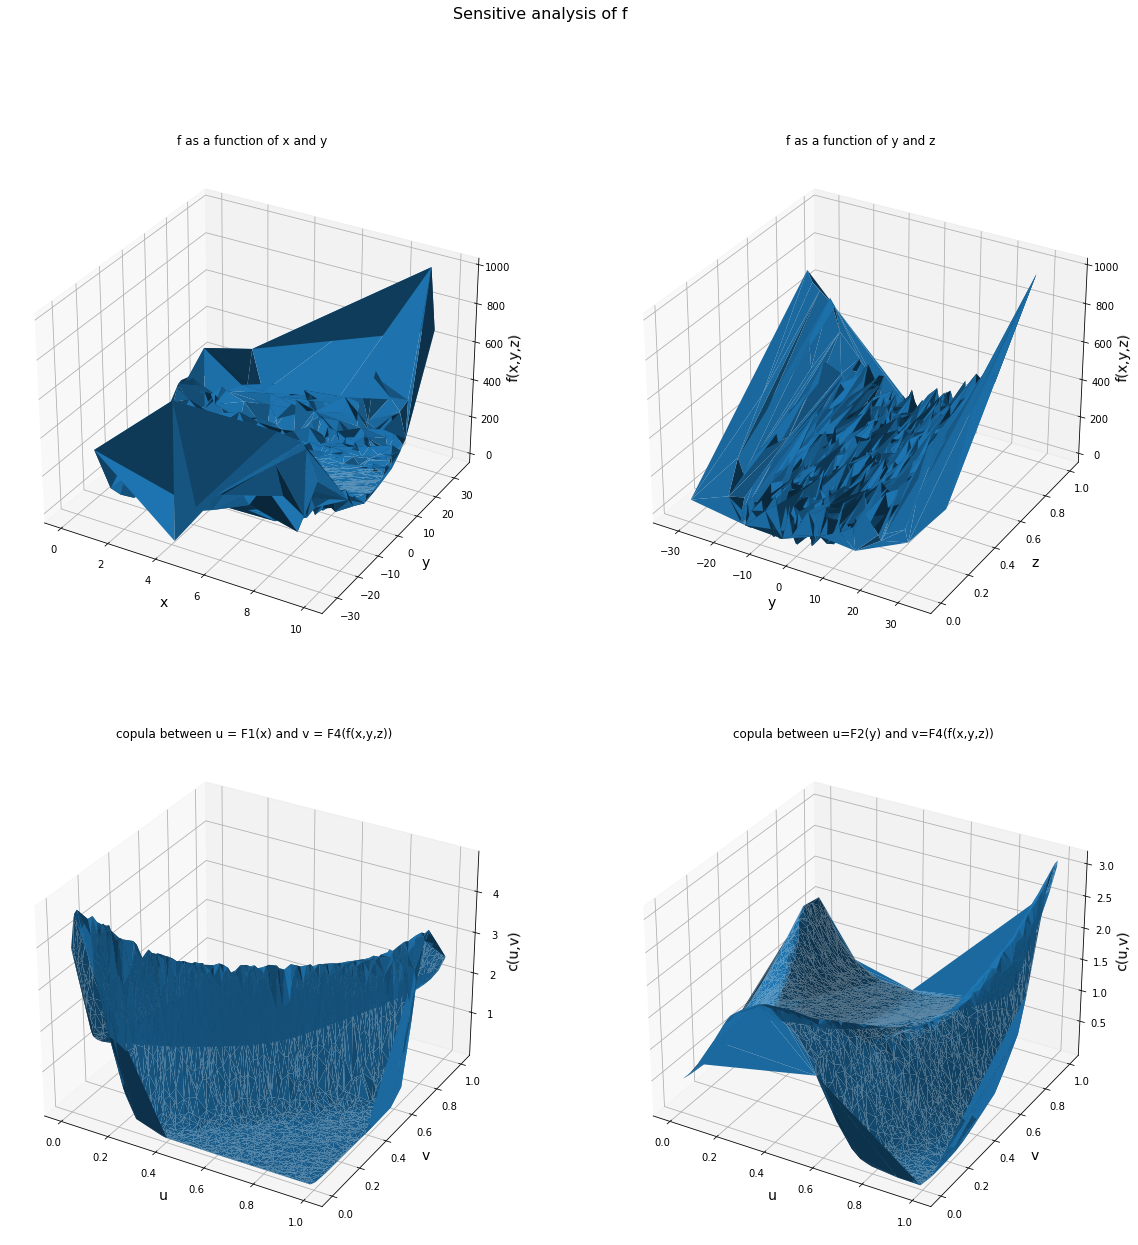

In [56]:
fig = plt.figure(figsize=(20,20))


# Add a subplot for each plot
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

# Add a title to the figure
fig.suptitle('Sensitive analysis of f', fontsize=16)

# Add titles to the axes for the first plot
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_zlabel('f(x,y,z)', fontsize=14)
ax1.set_title("f as a function of x and y ")
# Plot the data for the first plot
ax1.plot_trisurf(x,y,opt, linewidth=0.01)



# Add titles to the axes for the second plot
ax2.set_xlabel('y', fontsize=14)
ax2.set_ylabel('z', fontsize=14)
ax2.set_zlabel('f(x,y,z)', fontsize=14)
ax2.set_title("f as a function of y and z ")
# Plot the data for the second plot
ax2.plot_trisurf(y,z,opt, linewidth=0.01)
#ax2.plot_trisurf(gumbel_results["x"], gumbel_results["y"],gumbel_results["dense"], linewidth=0.01)






# Add titles to the axes for the first plot
ax3.set_xlabel('u', fontsize=14)
ax3.set_ylabel('v', fontsize=14)
ax3.set_zlabel('c(u,v)', fontsize=14)
ax3.set_title("copula between u = F1(x) and v = F4(f(x,y,z))")
# Plot the data for the first plot
ax3.plot_trisurf(x_results["x"], x_results["y"],x_results["dense"], linewidth=0.01)







# Add titles to the axes for the first plot
ax4.set_xlabel('u', fontsize=14)
ax4.set_ylabel('v', fontsize=14)
ax4.set_zlabel('c(u,v)', fontsize=14)
ax4.set_title("copula between u=F2(y) and v=F4(f(x,y,z))")
# Plot the data for the first plot
ax4.plot_trisurf(y_results["x"], y_results["y"],y_results["dense"], linewidth=0.01)


## Getting mutual information values

In [9]:
mice_x.mutual_information() #on trouve une "forte connexion" entre la variable x et l'output

31250/31250 [==============================] - 38s 1ms/step


0.5335959

In [10]:
np.sqrt(1-np.exp(-2*mice_x.mutual_information() ))

31250/31250 [==============================] - 36s 1ms/step


0.8100766662759638

#### Analyse de la variable x2

In [17]:
mice_y.mutual_information()

31250/31250 [==============================] - 32s 1ms/step


0.15503834

In [18]:
np.sqrt(1-np.exp(-2*mice_y.mutual_information() ))

31250/31250 [==============================] - 33s 1ms/step


0.5157255111800018

## Sobol sensitive analysis 
We are directly using SALib to perform a Sobol sensitive analysis and to compare it to our results.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol

In [20]:
problem = {
    'num_vars': 3,
    'names': ['x', 'y','z'],
    'bounds': [[0, 10],[0,10],[0,1]]
}

In [21]:
# sample
param_values = saltelli.sample(problem, 2**6)

# evaluate

y = f(param_values[:,0],param_values[:,1],param_values[:,2])

# analyse
sobol_indices = sobol.analyze(problem, y)#en espérant avoir la même chose, ou proche !!

In [22]:
sobol_indices

{'S1': array([ 0.86272467,  0.1155419 , -0.01133013]),
 'S1_conf': array([0.30450561, 0.10302291, 0.06345529]),
 'ST': array([0.87066247, 0.12763279, 0.02922899]),
 'ST_conf': array([0.25316359, 0.05022531, 0.01441649]),
 'S2': array([[       nan, 0.02402211, 0.03249788],
        [       nan,        nan, 0.01227229],
        [       nan,        nan,        nan]]),
 'S2_conf': array([[       nan, 0.30366353, 0.24928895],
        [       nan,        nan, 0.17315156],
        [       nan,        nan,        nan]])}

We can observe that our model provide similar ranking of the variables. However, our model provide much more deeper analysis by introducing local Mutual connexion index, estimating the mutual information for differents ranks for the variables. Thank's to that, we can observe in which section of the space a variable in more linkely to deeply impact the output!

## Local Mutual connexion index 
First we start with y :

(array([  5.,  22.,  81., 157., 209., 247., 165.,  83.,  24.,   7.]),
 array([-30.9090719 , -24.81446319, -18.71985448, -12.62524577,
         -6.53063706,  -0.43602835,   5.65858036,  11.75318907,
         17.84779778,  23.94240649,  30.03701521]),
 <BarContainer object of 10 artists>)

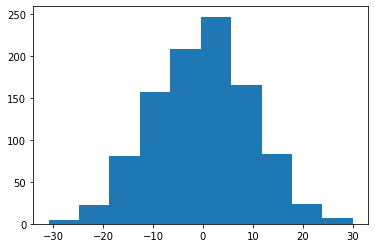

In [189]:
plt.hist(y) #y is envolving in the range [0,250], we can ask if it is has more impact is the high probability range [0,50]
# or if it has much more impact on the low probability range [200,250]!!

In [165]:
local_mutual_index_y_database=(mice_y.simulate(1000000)) #1 million points 
local_density_in_these_points_y = mice_y.copulas_density(local_mutual_index_y_database)

local_mutual_index_x_database=(mice_x.simulate(1000000)) #1 million points 
local_density_in_these_points_x = mice_x.copulas_density(local_mutual_index_x_database)

1563/1563 [==============================] - 9s 6ms/step


In [166]:
local_index_df_x = pd.DataFrame()
local_index_df_x["dense"] = np.squeeze(local_density_in_these_points_x)
local_index_df_x["y"] = local_mutual_index_x_database[:,0]
local_index_df_x["f"] = local_mutual_index_x_database[:,1]


local_index_df_y = pd.DataFrame()
local_index_df_y["dense"] = np.squeeze(local_density_in_these_points_y)
local_index_df_y["y"] = local_mutual_index_y_database[:,0]
local_index_df_y["f"] = local_mutual_index_y_database[:,1]

In [167]:
local_index_df_x #à partir de ces simulations, on peut calculer "l'impact" de chaque segment, et voir localement 
#dans quel contexte une perturbation locale pourrait très largement dégrader les performances

,dense,y,f
0,2.848786,0.872032,0.740328
1,1.233688,0.556027,0.552903
2,0.758560,0.016960,0.292313
3,0.458231,0.302938,0.605109
4,2.344068,0.698202,0.589101
...,...,...,...
9999995,3.245671,0.185180,0.054714
9999996,3.377126,0.349494,0.240924
9999997,3.520224,0.358923,0.225436
9999998,2.051076,0.114622,0.155606


In [168]:
def get_local_mutual_index(alpha,beta,df,points):
    #first step about local mutual index 
    ecdf = ECDF(points) #starting by getting the cumulative distrbution of the points 
    a,b = ecdf(alpha),ecdf(beta)
    points = df[df["y"]>a]
    points = df[df["y"]<b]
    
    return np.sqrt(1-np.exp(-2*np.mean(np.log(points["dense"])))) #,np.mean(np.log(points["dense"]))
    

In [169]:
get_local_mutual_index(40,50,local_index_df_y,y) #force du coefficient y 

0.5154103538402128

In [183]:
get_local_mutual_index(0,3,local_index_df_x,x)

0.7813465703123927

On va donc tracer le coefficient d'information mutuelle en fonction de la fenêtre [min,max] que l'on considère, le min étant toujours fixé en 0 et le max dépendant de la sortie... 

In [192]:
lst_y = []
val_y=[]
for i in range(-3,3):
    lst_y.append(10*i)
    val_y.append(get_local_mutual_index(10*i,10*(i+1),local_index_df_y,y))
    
lst_x = []
val_x=[]
for i in range(0,9):
    lst_x.append(i)
    val_x.append(get_local_mutual_index(i,(i+1),local_index_df_x,x))
  

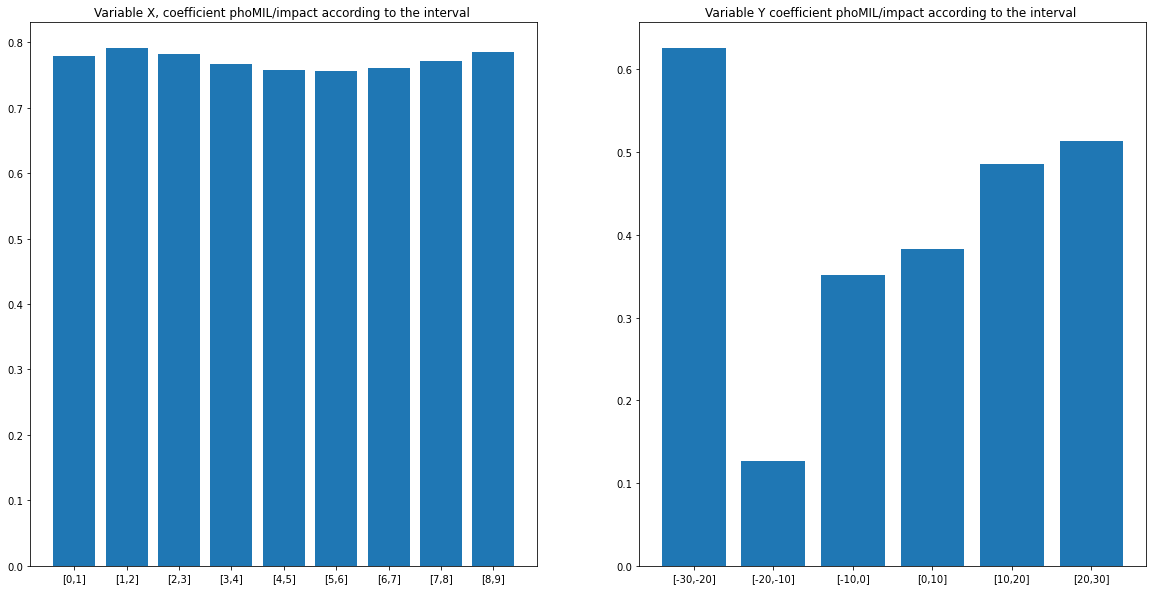

In [193]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#ax1 = fig.add_axes([0,0,1,1])
langs = ['[0,1]', '[1,2]', '[2,3]', '[3,4]', '[4,5]','[5,6]','[6,7]','[7,8]','[8,9]']
students = val_x
ax1.bar(langs,students)
ax1.set_title("Variable X, coefficient phoMIL/impact according to the interval ")

#ax2 = fig.add_axes([0,0,1,1])
langs = ['[-30,-20]','[-20,-10]', '[-10,0]', '[0,10]','[10,20]','[20,30]']
students = val_y
ax2.bar(langs,students)
ax2.set_title("Variable Y coefficient phoMIL/impact according to the interval ")

plt.show()
plt.show()

In [175]:
val_x

[0.7796496183691081,
 0.7910906272982045,
 0.7813465703123927,
 0.7662966884344958,
 0.758322749618267,
 0.7564602039440541,
 0.7612210121764035,
 0.7713457464776035]

### Then we continue with x : 